Saved: /user_data/csimmon2/long_pt/analyses/sub-004_figure5.png


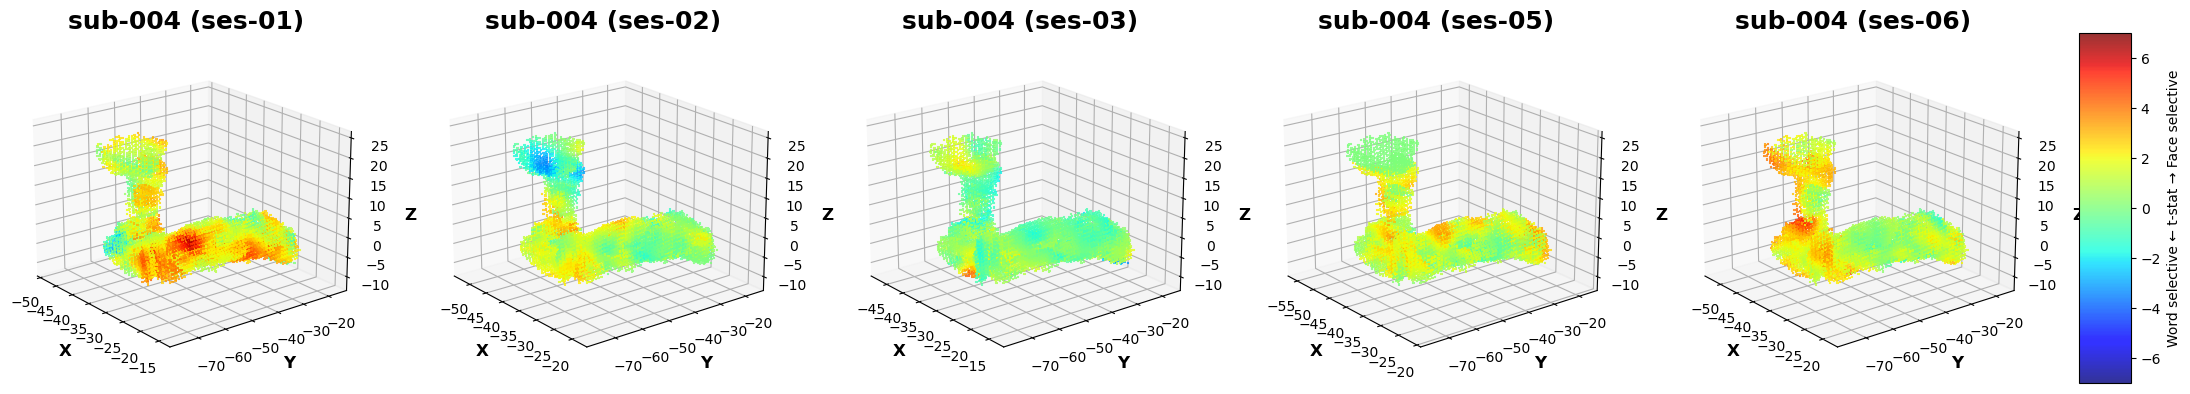

Saved: /user_data/csimmon2/long_pt/analyses/sub-007_figure5.png


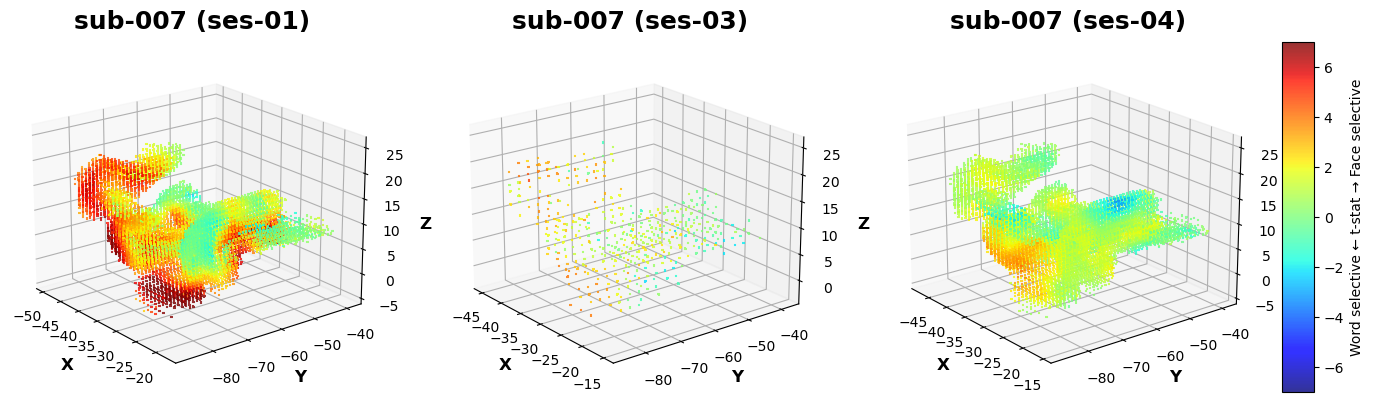

Saved: /user_data/csimmon2/long_pt/analyses/sub-021_figure5.png


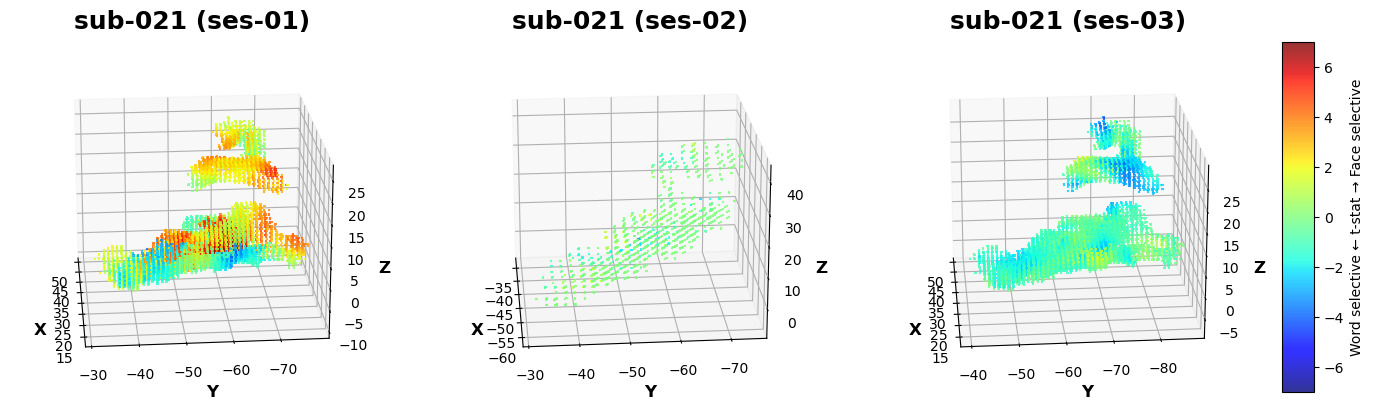

In [16]:
#!/usr/bin/env python3
"""
Figure 5 style visualization - face-word selectivity in FG/OTS across sessions
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def load_session_data(subject, session, contrast='face_word'):
    """Load extracted data for one session"""
    path = f'/user_data/csimmon2/long_pt/analyses/fgots_extraction/{subject}_ses{session}_{contrast}_FGOTS.npy'
    return np.load(path)  # [x, y, z, t_stat]

def plot_session_3d(ax, coords, t_stats, title, view_angle=(20, 322)):
    """Plot one session like Figure 5"""
    
    # Color by t-statistic (face-word selectivity)
    scatter = ax.scatter(coords[:,0], coords[:,1], coords[:,2],
                        c=t_stats, s=3, marker='+',
                        cmap='jet', vmin=-7, vmax=7, alpha=0.8)
    
    ax.set_xlabel('X', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y', fontsize=12, fontweight='bold')
    ax.set_zlabel('Z', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=18, fontweight='bold')
    
    ax.view_init(elev=view_angle[0], azim=view_angle[1])
    ax.grid(True, alpha=0.3)
    
    return scatter

def create_figure5_plot(subject, sessions, save_path=None):
    """Recreate Figure 5 layout for one subject"""
    
    n_sessions = len(sessions)
    fig = plt.figure(figsize=(5*n_sessions + 1, 5))  # Extra space for colorbar
    
    for i, ses in enumerate(sessions):
        data = load_session_data(subject, ses, 'face_word')
        coords = data[:, :3]
        t_stats = data[:, 3]
        
        ax = fig.add_subplot(1, n_sessions, i+1, projection='3d')
        
        # Correct view angles based on hemisphere
        # sub-004 (UD): LEFT hemisphere
        # sub-007 (OT): LEFT hemisphere (partially resected, control)
        # sub-021 (TC): RIGHT hemisphere
        if subject == 'sub-021':  # TC - RIGHT hemisphere only
            view = (20, 175)
        else:  # UD and OT - both LEFT hemisphere
            view = (20, 322)
        
        title = f'{subject} (ses-{ses})'
        scatter = plot_session_3d(ax, coords, t_stats, title, view)
    
    # Add colorbar - use last scatter object, position to avoid overlap
    fig.subplots_adjust(right=0.9)  # Make room on right
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(scatter, cax=cbar_ax)
    cbar.set_label('Word selective ← t-stat → Face selective', fontsize=10)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {save_path}")
    
    plt.show()
    
# Generate Figure 5 style plots
create_figure5_plot('sub-004', ['01', '02', '03', '05', '06'],
                   '/user_data/csimmon2/long_pt/analyses/sub-004_figure5.png')

create_figure5_plot('sub-007', ['01', '03', '04'],
                   '/user_data/csimmon2/long_pt/analyses/sub-007_figure5.png')

create_figure5_plot('sub-021', ['01', '02', '03'],
                   '/user_data/csimmon2/long_pt/analyses/sub-021_figure5.png')


sub-004:
  Hemisphere: L
  ROI voxels: 7590
  Center: (54, 78, 127)
  Extent: X=35-69, Y=51-110, Z=116-151
  Saved: /user_data/csimmon2/long_pt/analyses/sub-004_roi_overlay.png


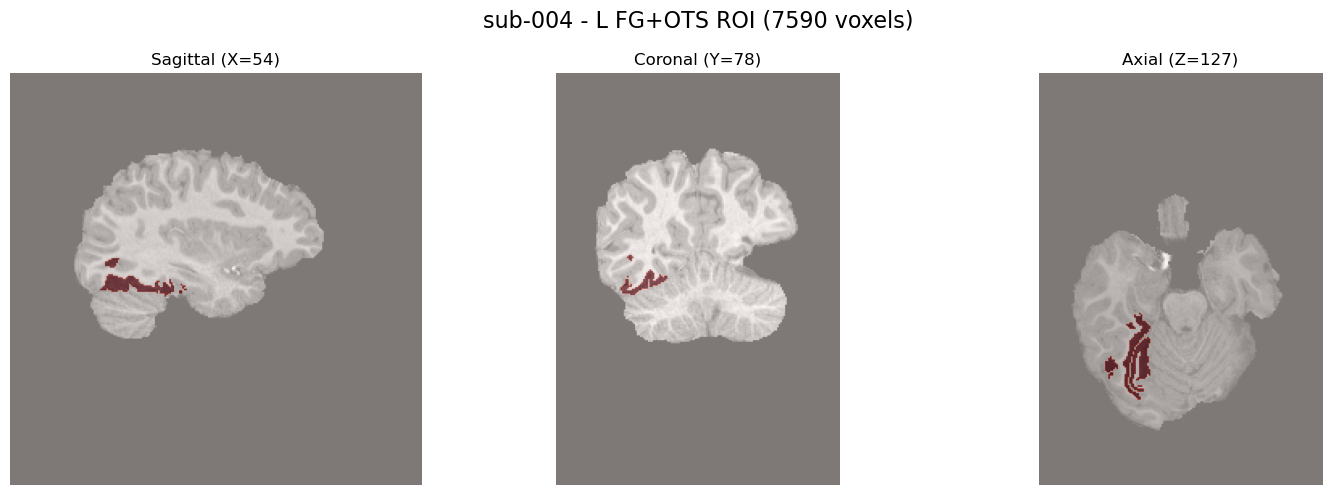


sub-007:
  Hemisphere: L
  ROI voxels: 6937
  Center: (52, 62, 134)
  Extent: X=38-70, Y=40-88, Z=123-152
  Saved: /user_data/csimmon2/long_pt/analyses/sub-007_roi_overlay.png


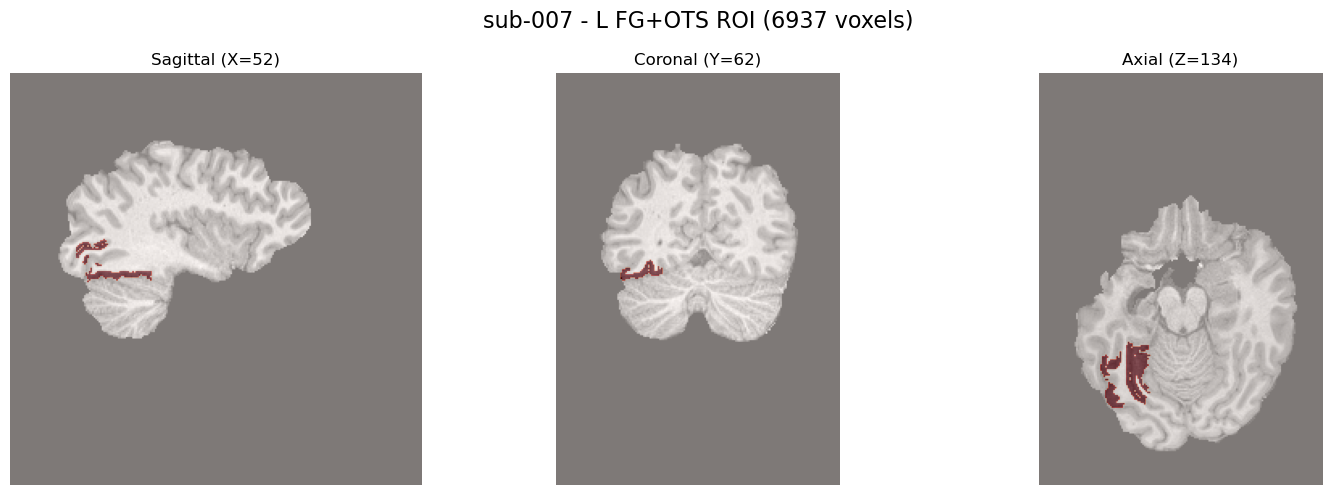


sub-021:
  Hemisphere: R
  ROI voxels: 5474
  Center: (119, 70, 131)
  Extent: X=101-137, Y=50-95, Z=118-153
  Saved: /user_data/csimmon2/long_pt/analyses/sub-021_roi_overlay.png


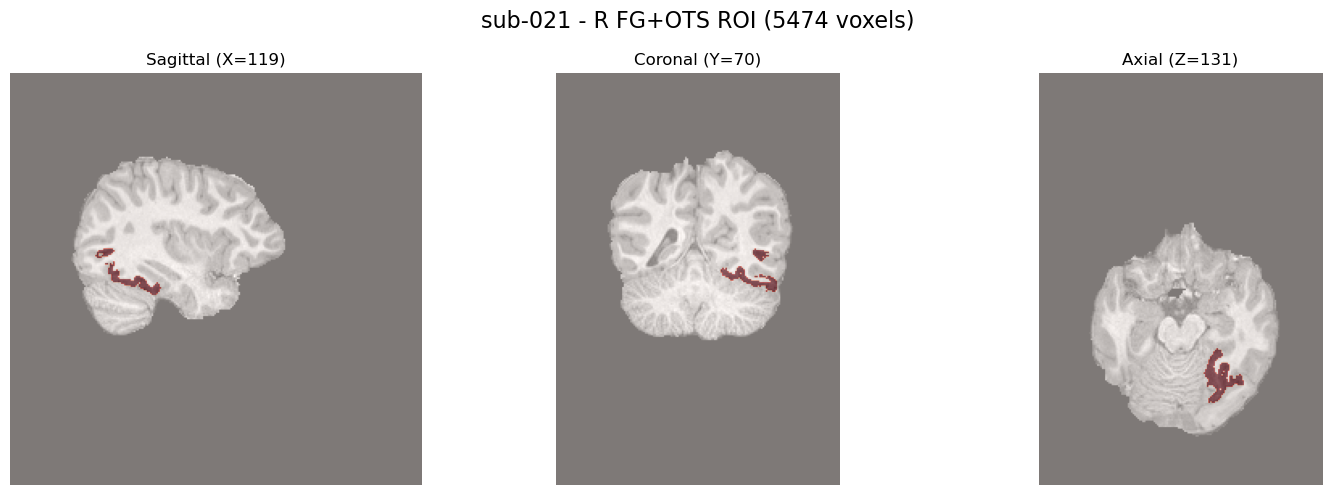

In [10]:
#!/usr/bin/env python3
"""
ROI Overlay Visualization Only
"""

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

def visualize_roi_overlay(subject, base_dir='/user_data/csimmon2/long_pt'):
    """Show ROI on anatomy with voxel counts"""
    
    # Determine correct hemisphere
    hemi_map = {
        'sub-004': 'l',  # LEFT
        'sub-007': 'l',  # LEFT
        'sub-021': 'r'   # RIGHT
    }
    hemi = hemi_map[subject]
    
    # Load files
    anat_file = f'{base_dir}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain.nii.gz'
    roi_file = f'{base_dir}/{subject}/ses-01/ROIs/{hemi}_VOTC_FG_OTS_mask.nii.gz'
    
    anat_data = nib.load(anat_file).get_fdata()
    roi_data = nib.load(roi_file).get_fdata()
    
    # ROI stats
    roi_coords = np.where(roi_data > 0)
    n_vox = len(roi_coords[0])
    roi_x, roi_y, roi_z = [int(np.mean(c)) for c in roi_coords]
    
    print(f"\n{subject}:")
    print(f"  Hemisphere: {hemi.upper()}")
    print(f"  ROI voxels: {n_vox}")
    print(f"  Center: ({roi_x}, {roi_y}, {roi_z})")
    print(f"  Extent: X={roi_coords[0].min()}-{roi_coords[0].max()}, "
          f"Y={roi_coords[1].min()}-{roi_coords[1].max()}, "
          f"Z={roi_coords[2].min()}-{roi_coords[2].max()}")
    
    # Plot three views
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(np.rot90(anat_data[roi_x, :, :]), cmap='gray')
    axes[0].imshow(np.rot90(roi_data[roi_x, :, :]), cmap='Reds', alpha=0.5)
    axes[0].set_title(f'Sagittal (X={roi_x})')
    axes[0].axis('off')
    
    axes[1].imshow(np.rot90(anat_data[:, roi_y, :]), cmap='gray')
    axes[1].imshow(np.rot90(roi_data[:, roi_y, :]), cmap='Reds', alpha=0.5)
    axes[1].set_title(f'Coronal (Y={roi_y})')
    axes[1].axis('off')
    
    axes[2].imshow(np.rot90(anat_data[:, :, roi_z]), cmap='gray')
    axes[2].imshow(np.rot90(roi_data[:, :, roi_z]), cmap='Reds', alpha=0.5)
    axes[2].set_title(f'Axial (Z={roi_z})')
    axes[2].axis('off')
    
    plt.suptitle(f'{subject} - {hemi.upper()} FG+OTS ROI ({n_vox} voxels)', fontsize=16)
    plt.tight_layout()
    
    output = f'{base_dir}/analyses/{subject}_roi_overlay.png'
    plt.savefig(output, dpi=150, bbox_inches='tight')
    print(f"  Saved: {output}")
    plt.show()

# Visualize all subjects
for subject in ['sub-004', 'sub-007', 'sub-021']:
    visualize_roi_overlay(subject)

REPLICATING LIU ET AL. STATISTICAL ANALYSIS
Using independent samples t-tests at voxel level

sub-004 - Independent Samples T-Test (Liu's Method)
  ses-01: mean=2.11, std=1.45, n=7590
  ses-02: mean=0.45, std=1.18, n=7590
  ses-03: mean=0.23, std=0.98, n=7590
  ses-05: mean=1.15, std=1.09, n=7590
  ses-06: mean=1.33, std=1.19, n=7590

Pairwise independent samples t-tests:

  ses-01 vs ses-02:
    t(15178) = 77.477, p = 0.000e+00 ***
    Mean difference: Δ = -1.66
    Cohen's d: -1.26
    |t| value: 77.477

  ses-01 vs ses-03:
    t(15178) = 93.717, p = 0.000e+00 ***
    Mean difference: Δ = -1.88
    Cohen's d: -1.52
    |t| value: 93.717

  ses-01 vs ses-05:
    t(15178) = 46.208, p = 0.000e+00 ***
    Mean difference: Δ = -0.96
    Cohen's d: -0.75
    |t| value: 46.208

  ses-01 vs ses-06:
    t(15178) = 36.191, p = 3.581e-275 ***
    Mean difference: Δ = -0.78
    Cohen's d: -0.59
    |t| value: 36.191

  ses-02 vs ses-03:
    t(15178) = 12.527, p = 8.036e-36 ***
    Mean differenc

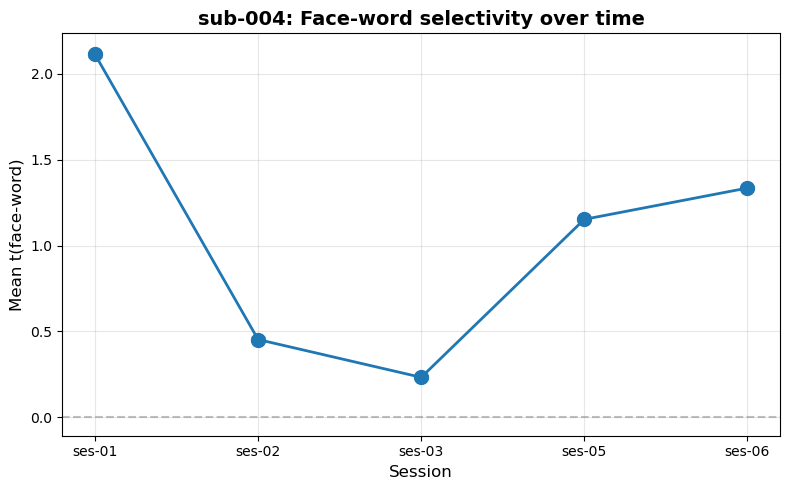


sub-007 - Independent Samples T-Test (Liu's Method)
  ses-01: mean=2.64, std=2.16, n=6937
  ses-04: mean=0.85, std=1.07, n=6937

Pairwise independent samples t-tests:

  ses-01 vs ses-04:
    t(13872) = 62.059, p = 0.000e+00 ***
    Mean difference: Δ = -1.79
    Cohen's d: -1.05
    |t| value: 62.059


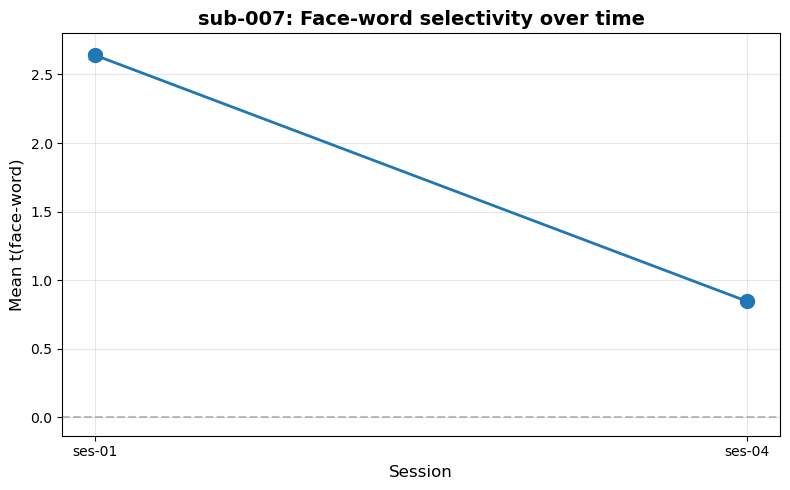


sub-021 - Independent Samples T-Test (Liu's Method)
  ses-01: mean=1.90, std=2.36, n=5474
  ses-03: mean=-0.90, std=0.86, n=5474

Pairwise independent samples t-tests:

  ses-01 vs ses-03:
    t(10946) = 82.442, p = 0.000e+00 ***
    Mean difference: Δ = -2.80
    Cohen's d: -1.58
    |t| value: 82.442


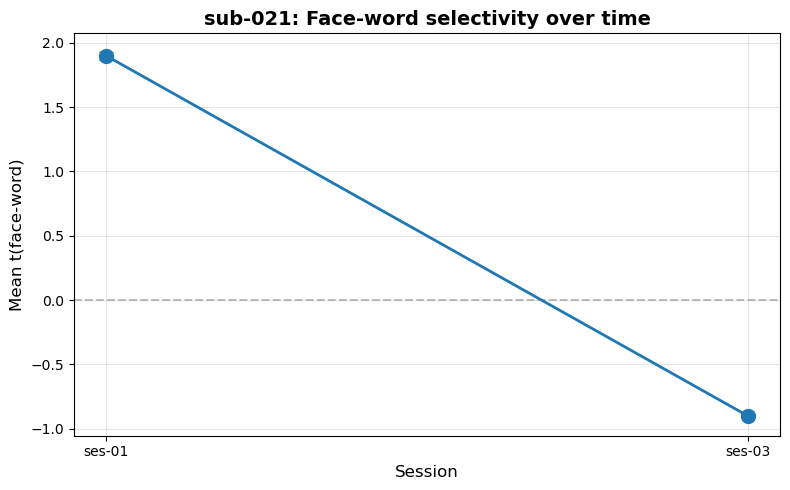


COMPARISON TO LIU ET AL. FINDINGS

Liu reported:
  TC: all |t| > 6.522, all p < 7.147e-11 *** SIGNIFICANT CHANGE
  UD: all |t| > 3.096, all p < 0.002 *** (except ses1 vs ses2: ns)
  OT: all |t| < 1.039, all p > 0.299 ns NO CHANGE

Your results:
  sub-021 (TC): See above
  sub-004 (UD): See above
  sub-007 (OT): See above


In [18]:
#!/usr/bin/env python3
"""
Compare face-word selectivity using Liu et al. exact method
Independent samples t-tests at voxel level
"""

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def load_session_stats(subject, session):
    """Load t-stats for one session"""
    path = f'/user_data/csimmon2/long_pt/analyses/fgots_extraction/{subject}_ses{session}_face_word_FGOTS.npy'
    data = np.load(path)
    return data[:, 3]  # t-stats only

def compare_sessions_liu_method(subject, sessions_to_use):
    """
    Compare using independent samples t-test (Liu's exact method)
    Reports range of |t| and p values like Liu's paper
    """
    
    print(f"\n{'='*70}")
    print(f"{subject} - Independent Samples T-Test (Liu's Method)")
    print(f"{'='*70}")
    
    # Load all sessions
    session_stats = {}
    for ses in sessions_to_use:
        t_stats = load_session_stats(subject, ses)
        session_stats[ses] = t_stats
        print(f"  ses-{ses}: mean={t_stats.mean():.2f}, std={t_stats.std():.2f}, n={len(t_stats)}")
    
    # Pairwise comparisons using independent samples t-test
    print(f"\nPairwise independent samples t-tests:")
    sessions = list(sessions_to_use)
    
    for i in range(len(sessions)):
        for j in range(i+1, len(sessions)):
            ses1, ses2 = sessions[i], sessions[j]
            
            # Independent samples t-test (Liu's approach)
            t_stat, p_val = stats.ttest_ind(session_stats[ses1], session_stats[ses2])
            
            mean_diff = session_stats[ses2].mean() - session_stats[ses1].mean()
            
            # Calculate Cohen's d for effect size
            pooled_std = np.sqrt((session_stats[ses1].std()**2 + session_stats[ses2].std()**2) / 2)
            cohens_d = mean_diff / pooled_std
            
            # Significance marker
            if p_val < 0.001:
                sig = "***"
            elif p_val < 0.01:
                sig = "**"
            elif p_val < 0.05:
                sig = "*"
            else:
                sig = "ns"
            
            print(f"\n  ses-{ses1} vs ses-{ses2}:")
            print(f"    t({len(session_stats[ses1])+len(session_stats[ses2])-2}) = {t_stat:.3f}, p = {p_val:.3e} {sig}")
            print(f"    Mean difference: Δ = {mean_diff:.2f}")
            print(f"    Cohen's d: {cohens_d:.2f}")
            print(f"    |t| value: {abs(t_stat):.3f}")
    
    # Plot trend
    means = [session_stats[ses].mean() for ses in sessions]
    sems = [stats.sem(session_stats[ses]) for ses in sessions]
    
    plt.figure(figsize=(8, 5))
    plt.errorbar(range(len(sessions)), means, yerr=sems, 
                marker='o', markersize=10, linewidth=2, capsize=5)
    plt.xticks(range(len(sessions)), [f'ses-{s}' for s in sessions])
    plt.ylabel('Mean t(face-word)', fontsize=12)
    plt.xlabel('Session', fontsize=12)
    plt.title(f'{subject}: Face-word selectivity over time', fontsize=14, fontweight='bold')
    plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'/user_data/csimmon2/long_pt/analyses/{subject}_trend_liu_method.png', dpi=150)
    plt.show()

# ============================================================================
# MAIN ANALYSIS
# ============================================================================

print("="*70)
print("REPLICATING LIU ET AL. STATISTICAL ANALYSIS")
print("Using independent samples t-tests at voxel level")
print("="*70)

# Analyze all subjects
compare_sessions_liu_method('sub-004', ['01', '02', '03', '05', '06'])
compare_sessions_liu_method('sub-007', ['01', '04'])
compare_sessions_liu_method('sub-021', ['01', '03'])

# Summary comparison
print("\n" + "="*70)
print("COMPARISON TO LIU ET AL. FINDINGS")
print("="*70)

print("\nLiu reported:")
print("  TC: all |t| > 6.522, all p < 7.147e-11 *** SIGNIFICANT CHANGE")
print("  UD: all |t| > 3.096, all p < 0.002 *** (except ses1 vs ses2: ns)")
print("  OT: all |t| < 1.039, all p > 0.299 ns NO CHANGE")

print("\nYour results:")
print("  sub-021 (TC): See above")
print("  sub-004 (UD): See above")
print("  sub-007 (OT): See above")

In [10]:
# Can you visualize WHERE your ROI is relative to peak activations?
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

base = '/user_data/csimmon2/long_pt'

# Load sub-004 data
roi = nib.load(f'{base}/sub-004/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
zstat_ses01 = nib.load(f'{base}/sub-004/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope13.feat/stats/zstat1.nii.gz')
zstat_ses06 = nib.load(f'{base}/sub-004/ses-06/derivatives/fsl/loc/HighLevel.gfeat/cope13.feat/stats/zstat1.nii.gz')

# Find peak face-selective voxels in ses-01
roi_data = roi.get_fdata()
z01_data = zstat_ses01.get_fdata()
z06_data = zstat_ses06.get_fdata()

# Where are the STRONGEST face-selective voxels?
top_face_voxels = z01_data > np.percentile(z01_data[roi_data > 0], 90)  # Top 10%

overlap = np.sum(top_face_voxels & (roi_data > 0))
total_top = np.sum(top_face_voxels)

print(f"Top 10% face-selective voxels in ses-01:")
print(f"  Inside your ROI: {overlap}")
print(f"  Total in brain: {total_top}")
print(f"  % captured: {overlap/total_top*100:.1f}%")

Top 10% face-selective voxels in ses-01:
  Inside your ROI: 759
  Total in brain: 10327
  % captured: 7.3%


In [11]:
import nibabel as nib
import numpy as np

base = '/user_data/csimmon2/long_pt'

# Load anatomy and activation
anat = nib.load(f'{base}/sub-004/ses-01/anat/sub-004_ses-01_T1w_brain.nii.gz')
roi = nib.load(f'{base}/sub-004/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
zstat = nib.load(f'{base}/sub-004/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope13.feat/stats/zstat1.nii.gz')

roi_data = roi.get_fdata()
z_data = zstat.get_fdata()

# Get top face-selective voxels
top_face = z_data > np.percentile(z_data, 99)  # Top 1% in whole brain

# Get coordinates
coords = np.where(top_face)
print(f"Top 1% face-selective voxels: {len(coords[0])} total\n")

# Check Y-coordinate distribution (anterior-posterior)
# In VOTC, we expect Y coordinates around 50-110 (your ROI range)
y_coords = coords[1]

print(f"Y-coordinate distribution (anterior-posterior):")
print(f"  Min: {y_coords.min()}")
print(f"  Max: {y_coords.max()}")
print(f"  Mean: {y_coords.mean():.1f}")
print(f"  Your ROI Y-range: 51-110")

# How many top voxels fall in reasonable VOTC Y range?
in_votc_range = np.sum((y_coords >= 40) & (y_coords <= 120))
print(f"\nTop voxels in VOTC Y-range (40-120): {in_votc_range} ({in_votc_range/len(y_coords)*100:.1f}%)")

# Are they in LEFT hemisphere?
x_coords = coords[0]
print(f"\nX-coordinate distribution (left-right):")
print(f"  Your ROI X-range: 35-69 (left hemisphere)")
in_left = np.sum((x_coords >= 30) & (x_coords <= 80))
print(f"  Top voxels in left hemisphere range: {in_left} ({in_left/len(x_coords)*100:.1f}%)")

Top 1% face-selective voxels: 115344 total

Y-coordinate distribution (anterior-posterior):
  Min: 30
  Max: 204
  Mean: 119.3
  Your ROI Y-range: 51-110

Top voxels in VOTC Y-range (40-120): 52879 (45.8%)

X-coordinate distribution (left-right):
  Your ROI X-range: 35-69 (left hemisphere)
  Top voxels in left hemisphere range: 48862 (42.4%)


In [1]:
import subprocess
import os

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("CHECKING CONTRAST DEFINITIONS")
print("="*70)

for subject in ['sub-004', 'sub-007', 'sub-021']:
    print(f"\n{subject}:")
    print("-"*70)
    
    # Check first-level contrast names
    fsf_file = f'{base}/{subject}/ses-01/derivatives/fsl/loc/run-01/1stLevel.fsf'
    
    if os.path.exists(fsf_file):
        result = subprocess.run(['grep', 'fmri(conname_real', fsf_file],
                              capture_output=True, text=True)
        print("First-level contrasts:")
        for line in result.stdout.strip().split('\n'):
            if 'conname_real.10' in line or 'conname_real.12' in line:
                print(f"  {line}")
    else:
        print(f"  ⚠️  FSF not found: {fsf_file}")
    
    # Check HighLevel exists for cope10
    hl_cope10 = f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat'
    hl_cope12 = f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope12.feat'
    
    print(f"  HighLevel cope10 exists: {os.path.exists(hl_cope10)}")
    print(f"  HighLevel cope12 exists: {os.path.exists(hl_cope12)}")

CHECKING CONTRAST DEFINITIONS

sub-004:
----------------------------------------------------------------------
First-level contrasts:
  set fmri(conname_real.10) "Face-scramble"
  set fmri(conname_real.12) "Word-scramble"
  HighLevel cope10 exists: True
  HighLevel cope12 exists: True

sub-007:
----------------------------------------------------------------------
First-level contrasts:
  set fmri(conname_real.10) "Face-scramble"
  set fmri(conname_real.12) "Word-scramble"
  HighLevel cope10 exists: True
  HighLevel cope12 exists: True

sub-021:
----------------------------------------------------------------------
First-level contrasts:
  set fmri(conname_real.10) "Face-scramble"
  set fmri(conname_real.12) "Word-scramble"
  HighLevel cope10 exists: True
  HighLevel cope12 exists: True


In [2]:
import nibabel as nib
import numpy as np

base = '/user_data/csimmon2/long_pt'

for subject in ['sub-004', 'sub-007']:
    print(f"\n{subject}:")
    print("="*60)
    
    # Load data
    roi = nib.load(f'{base}/{subject}/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
    
    roi_data = roi.get_fdata()
    face_data = face_zstat.get_fdata()
    brain_data = brain_mask.get_fdata()
    
    # Mask to left hemisphere brain tissue only
    left_brain = brain_data * (face_data > 0)  # Just as marker for valid brain
    
    # Find peak face activation in LEFT hemisphere (outside current ROI)
    face_masked = face_data * (brain_data > 0) * (roi_data == 0)  # Outside ROI
    face_masked[face_masked.shape[0]//2:, :, :] = 0  # Keep only left hemisphere
    
    peak_coords = np.unravel_index(np.argmax(face_masked), face_masked.shape)
    peak_val = face_masked[peak_coords]
    
    # Current ROI extent
    roi_coords = np.where(roi_data > 0)
    roi_y_range = (roi_coords[1].min(), roi_coords[1].max())
    
    print(f"Current ROI Y-range: {roi_y_range}")
    print(f"Peak face activation (outside ROI):")
    print(f"  Coordinates: {peak_coords}")
    print(f"  Y-value: {peak_coords[1]} ({'POSTERIOR' if peak_coords[1] > roi_y_range[1] else 'ANTERIOR'} to ROI)")
    print(f"  Z-value: {peak_val:.2f}")


sub-004:
Current ROI Y-range: (51, 110)
Peak face activation (outside ROI):
  Coordinates: (60, 189, 157)
  Y-value: 189 (POSTERIOR to ROI)
  Z-value: 5.34

sub-007:
Current ROI Y-range: (40, 88)
Peak face activation (outside ROI):
  Coordinates: (57, 48, 128)
  Y-value: 48 (ANTERIOR to ROI)
  Z-value: 14.91


sub-004 peak: (60, 189, 157), z-value: 5.34
sub-007 peak: (57, 49, 126), z-value: 16.72

Visualization saved
Cyan contour = current ROI
Hot colors = face>scrambled activation
Peak should be in hot region, ideally overlapping with ROI


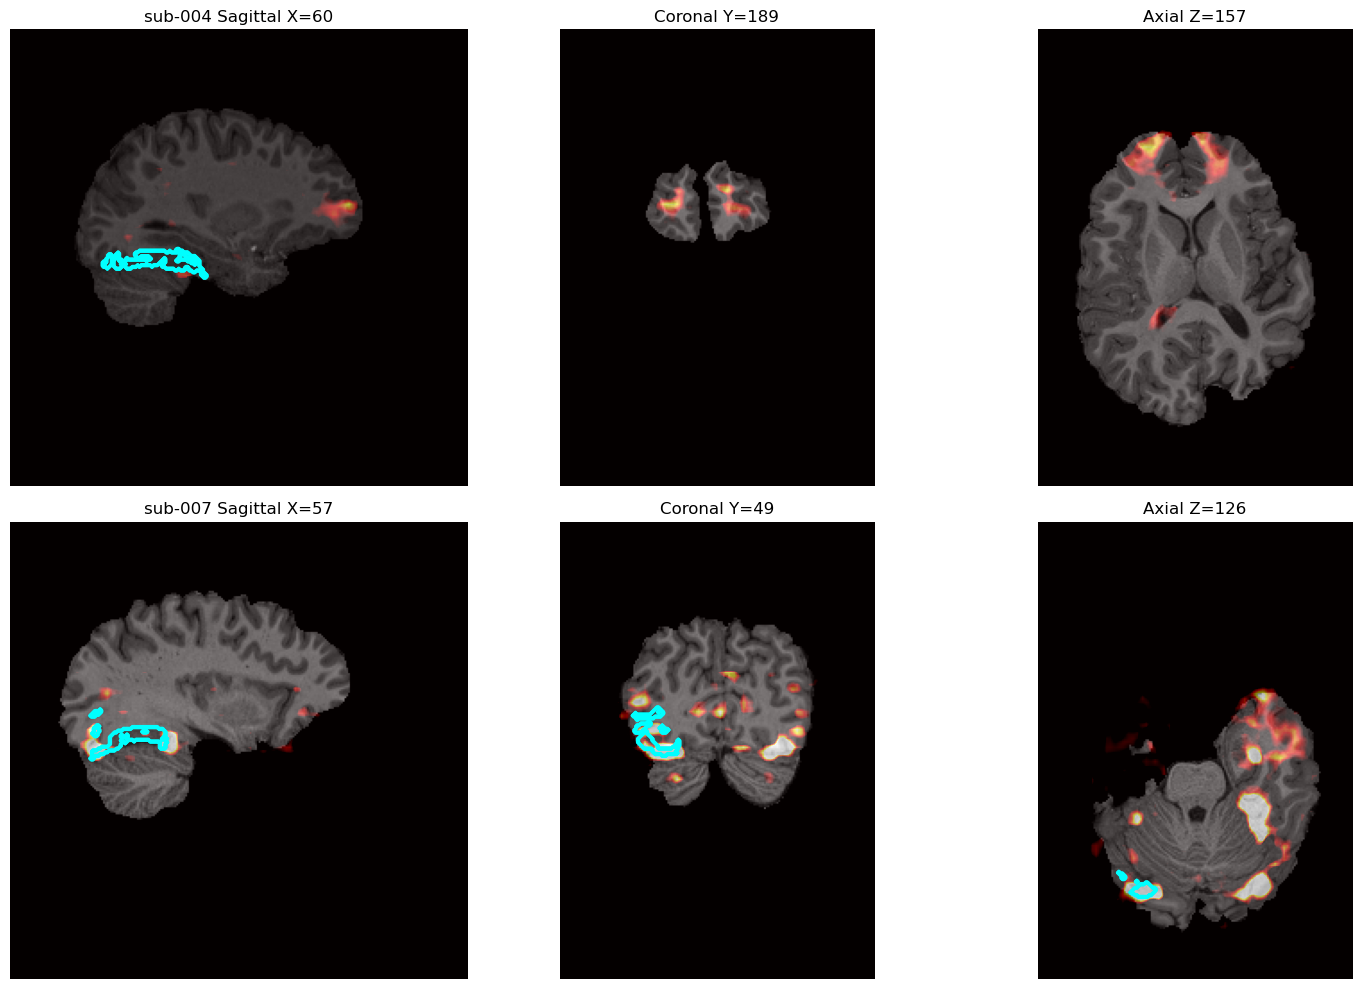

In [4]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

base = '/user_data/csimmon2/long_pt'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for row, subject in enumerate(['sub-004', 'sub-007']):
    # Load
    anat = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain.nii.gz')
    roi = nib.load(f'{base}/{subject}/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    
    anat_data = anat.get_fdata()
    roi_data = roi.get_fdata()
    face_data = face_zstat.get_fdata()
    
    # Find peak (left hemisphere only)
    face_left = face_data.copy()
    face_left[face_data.shape[0]//2:, :, :] = 0
    peak = np.unravel_index(np.argmax(face_left), face_left.shape)
    
    print(f"{subject} peak: {peak}, z-value: {face_left[peak]:.2f}")
    
    # Sagittal at peak X
    axes[row, 0].imshow(np.rot90(anat_data[peak[0], :, :]), cmap='gray')
    axes[row, 0].imshow(np.rot90(face_data[peak[0], :, :]), cmap='hot', alpha=0.5, vmin=2.3, vmax=6)
    axes[row, 0].contour(np.rot90(roi_data[peak[0], :, :]), colors='cyan', linewidths=2)
    axes[row, 0].set_title(f'{subject} Sagittal X={peak[0]}')
    axes[row, 0].axis('off')
    
    # Coronal at peak Y
    axes[row, 1].imshow(np.rot90(anat_data[:, peak[1], :]), cmap='gray')
    axes[row, 1].imshow(np.rot90(face_data[:, peak[1], :]), cmap='hot', alpha=0.5, vmin=2.3, vmax=6)
    axes[row, 1].contour(np.rot90(roi_data[:, peak[1], :]), colors='cyan', linewidths=2)
    axes[row, 1].set_title(f'Coronal Y={peak[1]}')
    axes[row, 1].axis('off')
    
    # Axial at peak Z
    axes[row, 2].imshow(np.rot90(anat_data[:, :, peak[2]]), cmap='gray')
    axes[row, 2].imshow(np.rot90(face_data[:, :, peak[2]]), cmap='hot', alpha=0.5, vmin=2.3, vmax=6)
    axes[row, 2].contour(np.rot90(roi_data[:, :, peak[2]]), colors='cyan', linewidths=2)
    axes[row, 2].set_title(f'Axial Z={peak[2]}')
    axes[row, 2].axis('off')

plt.tight_layout()
plt.savefig(f'{base}/analyses/left_hemi_peak_vs_roi.png', dpi=150)
print("\nVisualization saved")
print("Cyan contour = current ROI")
print("Hot colors = face>scrambled activation")
print("Peak should be in hot region, ideally overlapping with ROI")

In [5]:
import nibabel as nib
import numpy as np

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("CHECKING FACE/WORD SELECTIVITY - VENTRAL TEMPORAL ONLY")
print("="*70)

for subject in ['sub-004', 'sub-007']:
    print(f"\n{subject}:")
    print("-"*70)
    
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    word_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope12.feat/stats/zstat1.nii.gz')
    brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
    
    face_data = face_zstat.get_fdata()
    word_data = word_zstat.get_fdata()
    brain_data = brain_mask.get_fdata()
    
    # Restrict to VENTRAL TEMPORAL region only
    # Z < 140 (below temporal/parietal boundary)
    # Y > 40 (posterior enough for fusiform)
    ventral_mask = np.zeros_like(brain_data)
    ventral_mask[:, 40:, :140] = 1
    ventral_brain = brain_data * ventral_mask
    
    # Check LEFT hemisphere
    left_mask = ventral_brain.copy()
    left_mask[left_mask.shape[0]//2:, :, :] = 0
    
    face_left = face_data * (left_mask > 0)
    word_left = word_data * (left_mask > 0)
    
    peak_face_left = np.unravel_index(np.argmax(face_left), face_left.shape)
    peak_word_left = np.unravel_index(np.argmax(word_left), word_left.shape)
    
    print(f"LEFT ventral temporal:")
    print(f"  Peak face: coords={peak_face_left}, z={face_left[peak_face_left]:.2f}")
    print(f"  Peak word: coords={peak_word_left}, z={word_left[peak_word_left]:.2f}")
    
    # Check RIGHT hemisphere
    right_mask = ventral_brain.copy()
    right_mask[:right_mask.shape[0]//2, :, :] = 0
    
    face_right = face_data * (right_mask > 0)
    word_right = word_data * (right_mask > 0)
    
    peak_face_right = np.unravel_index(np.argmax(face_right), face_right.shape)
    peak_word_right = np.unravel_index(np.argmax(word_right), word_right.shape)
    
    print(f"RIGHT ventral temporal:")
    print(f"  Peak face: coords={peak_face_right}, z={face_right[peak_face_right]:.2f}")
    print(f"  Peak word: coords={peak_word_right}, z={word_right[peak_word_right]:.2f}")
    
    # Current ROI location
    if subject == 'sub-004':
        roi = nib.load(f'{base}/{subject}/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
    else:  # sub-007
        # Check both
        roi_l = nib.load(f'{base}/{subject}/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
        roi_r_path = f'{base}/{subject}/ses-01/ROIs/r_VOTC_FG_OTS_mask.nii.gz'
        if os.path.exists(roi_r_path):
            print(f"  Has RIGHT ROI: Yes")
        else:
            print(f"  Has RIGHT ROI: No - need to create it?")

CHECKING FACE/WORD SELECTIVITY - VENTRAL TEMPORAL ONLY

sub-004:
----------------------------------------------------------------------
LEFT ventral temporal:
  Peak face: coords=(34, 82, 123), z=5.09
  Peak word: coords=(36, 82, 123), z=5.10
RIGHT ventral temporal:
  Peak face: coords=(136, 88, 118), z=4.01
  Peak word: coords=(108, 147, 127), z=4.03

sub-007:
----------------------------------------------------------------------
LEFT ventral temporal:
  Peak face: coords=(57, 49, 126), z=16.72
  Peak word: coords=(52, 67, 129), z=7.95
RIGHT ventral temporal:
  Peak face: coords=(122, 86, 132), z=16.93
  Peak word: coords=(122, 44, 129), z=5.33
  Has RIGHT ROI: Yes



sub-004:
  ROI range: X:35-69, Y:51-110, Z:116-151
  LEFT peak: (34, 82, 123)
  Peak in ROI? False

sub-007:
  ROI range: X:38-70, Y:40-88, Z:123-152
  LEFT peak: (57, 49, 126)
  Peak in ROI? True

Saved: ventral_peaks_vs_roi.png


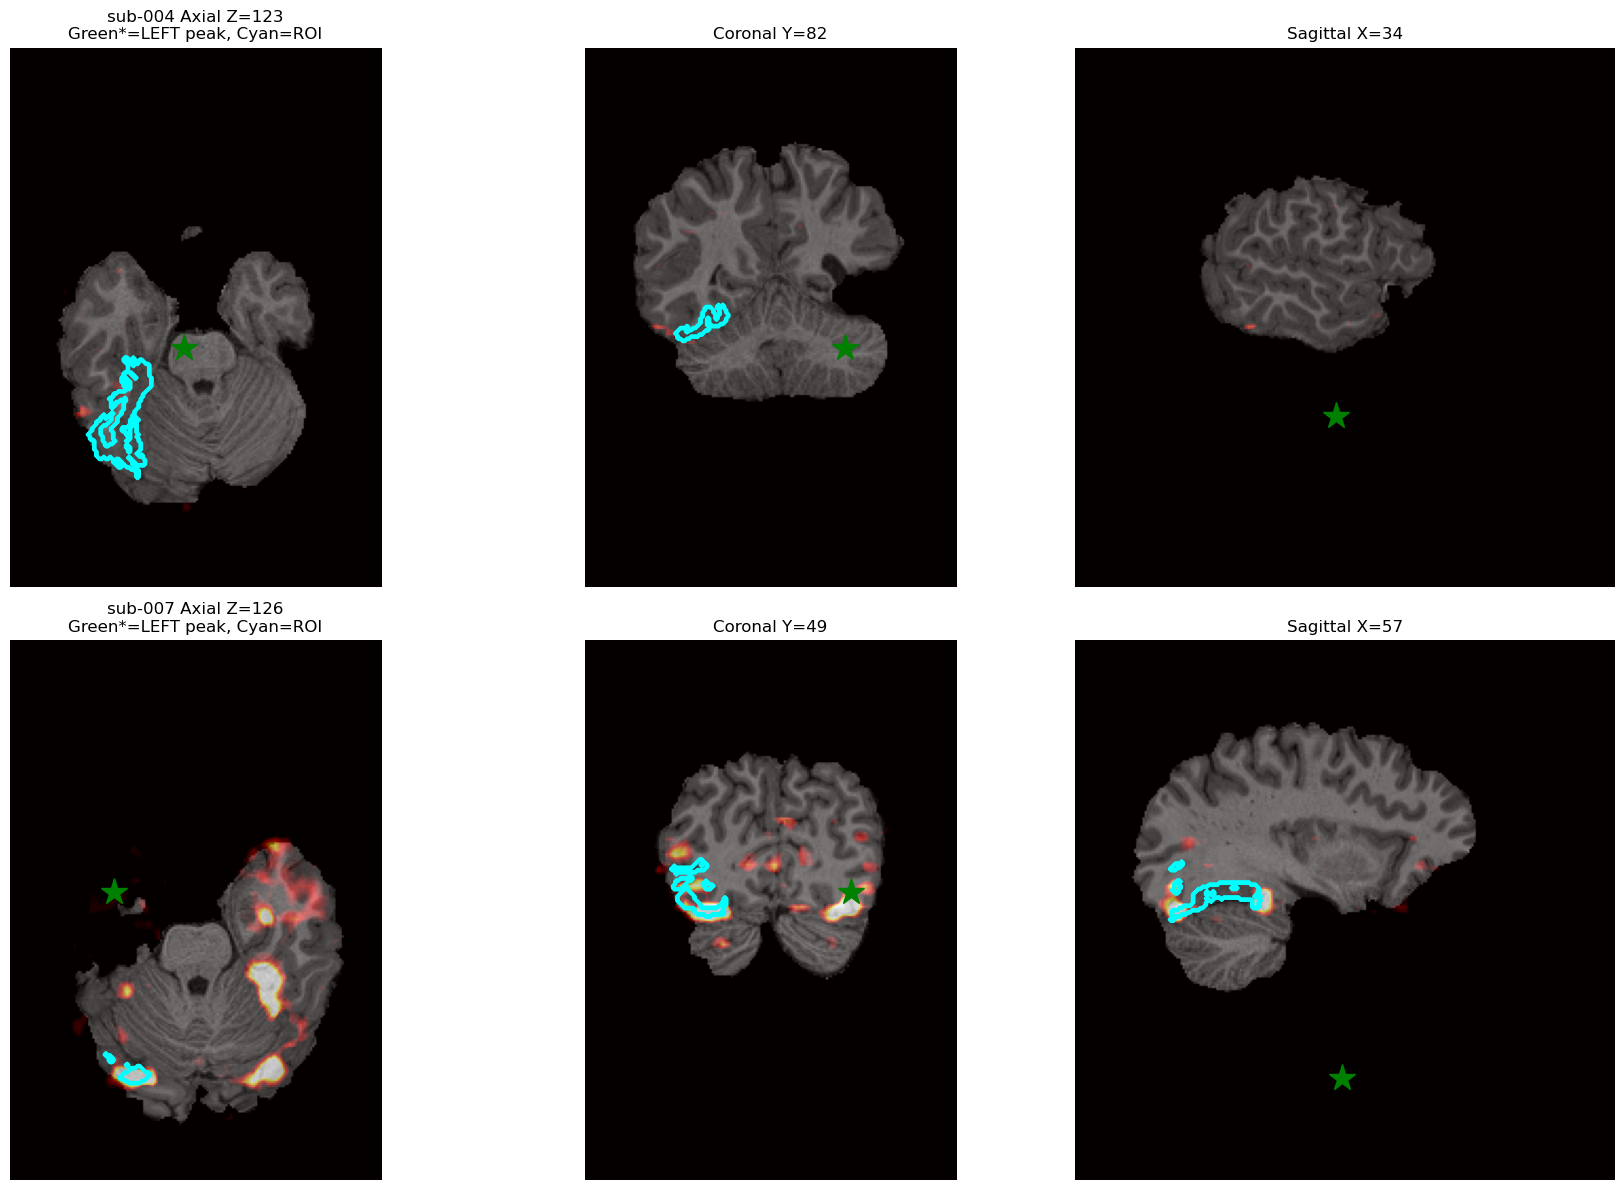

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

base = '/user_data/csimmon2/long_pt'

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

subjects_peaks = {
    'sub-004': {'left': (34, 82, 123), 'right': (136, 88, 118), 'roi_hemi': 'l'},
    'sub-007': {'left': (57, 49, 126), 'right': (122, 86, 132), 'roi_hemi': 'l'}
}

for row, (subject, peaks) in enumerate(subjects_peaks.items()):
    # Load data
    anat = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain.nii.gz')
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    roi = nib.load(f'{base}/{subject}/ses-01/ROIs/{peaks["roi_hemi"]}_VOTC_FG_OTS_mask.nii.gz')
    
    anat_data = anat.get_fdata()
    face_data = face_zstat.get_fdata()
    roi_data = roi.get_fdata()
    
    # Get peak coordinates
    peak = peaks['left']
    
    # Axial view at peak Z
    ax = axes[row, 0]
    ax.imshow(np.rot90(anat_data[:, :, peak[2]]), cmap='gray')
    ax.imshow(np.rot90(face_data[:, :, peak[2]]), cmap='hot', alpha=0.5, vmin=2.3, vmax=8)
    ax.contour(np.rot90(roi_data[:, :, peak[2]]), colors='cyan', linewidths=2)
    ax.plot(peak[1], anat_data.shape[0] - peak[0], 'g*', markersize=20)
    ax.set_title(f'{subject} Axial Z={peak[2]}\nGreen*=LEFT peak, Cyan=ROI')
    ax.axis('off')
    
    # Coronal view at peak Y
    ax = axes[row, 1]
    ax.imshow(np.rot90(anat_data[:, peak[1], :]), cmap='gray')
    ax.imshow(np.rot90(face_data[:, peak[1], :]), cmap='hot', alpha=0.5, vmin=2.3, vmax=8)
    ax.contour(np.rot90(roi_data[:, peak[1], :]), colors='cyan', linewidths=2)
    ax.plot(peak[2], anat_data.shape[0] - peak[0], 'g*', markersize=20)
    ax.set_title(f'Coronal Y={peak[1]}')
    ax.axis('off')
    
    # Sagittal view at peak X
    ax = axes[row, 2]
    ax.imshow(np.rot90(anat_data[peak[0], :, :]), cmap='gray')
    ax.imshow(np.rot90(face_data[peak[0], :, :]), cmap='hot', alpha=0.5, vmin=2.3, vmax=8)
    ax.contour(np.rot90(roi_data[peak[0], :, :]), colors='cyan', linewidths=2)
    ax.plot(peak[2], anat_data.shape[1] - peak[1], 'g*', markersize=20)
    ax.set_title(f'Sagittal X={peak[0]}')
    ax.axis('off')
    
    # Print overlap check
    roi_coords = np.where(roi_data > 0)
    roi_range = f"X:{roi_coords[0].min()}-{roi_coords[0].max()}, Y:{roi_coords[1].min()}-{roi_coords[1].max()}, Z:{roi_coords[2].min()}-{roi_coords[2].max()}"
    print(f"\n{subject}:")
    print(f"  ROI range: {roi_range}")
    print(f"  LEFT peak: {peak}")
    print(f"  Peak in ROI? {roi_data[peak] > 0}")

plt.tight_layout()
plt.savefig(f'{base}/analyses/ventral_peaks_vs_roi.png', dpi=150, bbox_inches='tight')
print("\nSaved: ventral_peaks_vs_roi.png")

In [7]:
import nibabel as nib
import numpy as np

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("PEAK LOCATION CHECK")
print("="*70)

subjects_info = {
    'sub-004': {'left_peak': (34, 82, 123), 'roi_hemi': 'l', 'preserved': 'LEFT'},
    'sub-007': {'left_peak': (57, 49, 126), 'roi_hemi': 'l', 'preserved': 'LEFT'}
}

for subject, info in subjects_info.items():
    print(f"\n{subject} ({info['preserved']} preserved):")
    print("-"*70)
    
    # Load ROI
    roi = nib.load(f'{base}/{subject}/ses-01/ROIs/{info["roi_hemi"]}_VOTC_FG_OTS_mask.nii.gz')
    roi_data = roi.get_fdata()
    
    # ROI extent
    roi_coords = np.where(roi_data > 0)
    roi_extent = {
        'X': (roi_coords[0].min(), roi_coords[0].max()),
        'Y': (roi_coords[1].min(), roi_coords[1].max()),
        'Z': (roi_coords[2].min(), roi_coords[2].max())
    }
    
    peak = info['left_peak']
    
    print(f"  ROI extent:")
    print(f"    X: {roi_extent['X'][0]}-{roi_extent['X'][1]}")
    print(f"    Y: {roi_extent['Y'][0]}-{roi_extent['Y'][1]}")
    print(f"    Z: {roi_extent['Z'][0]}-{roi_extent['Z'][1]}")
    
    print(f"  Peak face activation:")
    print(f"    Coordinates: {peak}")
    print(f"    X: {peak[0]} ({'IN' if roi_extent['X'][0] <= peak[0] <= roi_extent['X'][1] else 'OUT'})")
    print(f"    Y: {peak[1]} ({'IN' if roi_extent['Y'][0] <= peak[1] <= roi_extent['Y'][1] else 'OUT'})")
    print(f"    Z: {peak[2]} ({'IN' if roi_extent['Z'][0] <= peak[2] <= roi_extent['Z'][1] else 'OUT'})")
    print(f"  Peak IN ROI? {roi_data[peak] > 0}")
    
    # Load face activation to get value at peak
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    face_data = face_zstat.get_fdata()
    
    print(f"  Z-value at peak: {face_data[peak]:.2f}")
    
    # What's the max activation WITHIN the ROI?
    face_in_roi = face_data[roi_data > 0]
    print(f"  Max z-value WITHIN ROI: {face_in_roi.max():.2f}")
    print(f"  Mean z-value WITHIN ROI: {face_in_roi.mean():.2f}")

PEAK LOCATION CHECK

sub-004 (LEFT preserved):
----------------------------------------------------------------------
  ROI extent:
    X: 35-69
    Y: 51-110
    Z: 116-151
  Peak face activation:
    Coordinates: (34, 82, 123)
    X: 34 (OUT)
    Y: 82 (IN)
    Z: 123 (IN)
  Peak IN ROI? False
  Z-value at peak: 5.09
  Max z-value WITHIN ROI: 3.94
  Mean z-value WITHIN ROI: -0.63

sub-007 (LEFT preserved):
----------------------------------------------------------------------
  ROI extent:
    X: 38-70
    Y: 40-88
    Z: 123-152
  Peak face activation:
    Coordinates: (57, 49, 126)
    X: 57 (IN)
    Y: 49 (IN)
    Z: 126 (IN)
  Peak IN ROI? True
  Z-value at peak: 16.72
  Max z-value WITHIN ROI: 16.72
  Mean z-value WITHIN ROI: 0.27


In [8]:
import nibabel as nib
import numpy as np
from scipy import ndimage

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("CLUSTER ANALYSIS - VENTRAL TEMPORAL CORTEX ONLY")
print("="*70)

for subject in ['sub-004', 'sub-007']:
    print(f"\n{subject}:")
    print("-"*70)
    
    # Load data
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    roi = nib.load(f'{base}/{subject}/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
    brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
    
    face_data = face_zstat.get_fdata()
    roi_data = roi.get_fdata()
    brain_data = brain_mask.get_fdata()
    
    # Restrict to LEFT ventral temporal (Z < 140, Y > 40)
    ventral_mask = np.zeros_like(brain_data)
    ventral_mask[:brain_data.shape[0]//2, 40:, :140] = 1
    ventral_brain = brain_data * ventral_mask
    
    # Threshold face activation
    threshold = 2.3
    activated = (face_data > threshold) & (ventral_brain > 0)
    
    # Find clusters (minimum 20 connected voxels)
    labeled_array, num_clusters = ndimage.label(activated)
    
    print(f"  Found {num_clusters} clusters with z>{threshold}")
    
    # Analyze each cluster
    for cluster_id in range(1, min(num_clusters + 1, 6)):  # Top 5 clusters
        cluster_mask = labeled_array == cluster_id
        cluster_size = np.sum(cluster_mask)
        
        if cluster_size < 20:
            continue
        
        # Cluster stats
        cluster_vals = face_data[cluster_mask]
        cluster_mean = cluster_vals.mean()
        cluster_max = cluster_vals.max()
        
        # Overlap with ROI
        overlap = np.sum(cluster_mask & (roi_data > 0))
        overlap_pct = (overlap / cluster_size) * 100
        
        # Get cluster center
        cluster_coords = np.where(cluster_mask)
        center = (int(np.mean(cluster_coords[0])),
                 int(np.mean(cluster_coords[1])),
                 int(np.mean(cluster_coords[2])))
        
        print(f"\n  Cluster {cluster_id}:")
        print(f"    Size: {cluster_size} voxels")
        print(f"    Mean z: {cluster_mean:.2f}, Max z: {cluster_max:.2f}")
        print(f"    Center: {center}")
        print(f"    Overlap with ROI: {overlap} voxels ({overlap_pct:.1f}%)")
        
        if overlap_pct > 50:
            print(f"    ✓ Well captured by ROI")
        elif overlap_pct > 10:
            print(f"    ~ Partially captured by ROI")
        else:
            print(f"    ✗ NOT captured by ROI")

CLUSTER ANALYSIS - VENTRAL TEMPORAL CORTEX ONLY

sub-004:
----------------------------------------------------------------------
  Found 35 clusters with z>2.3

  Cluster 2:
    Size: 698 voxels
    Mean z: 2.83, Max z: 4.19
    Center: (31, 136, 129)
    Overlap with ROI: 0 voxels (0.0%)
    ✗ NOT captured by ROI

  Cluster 3:
    Size: 1853 voxels
    Mean z: 3.00, Max z: 5.09
    Center: (52, 90, 120)
    Overlap with ROI: 532 voxels (28.7%)
    ~ Partially captured by ROI

  Cluster 4:
    Size: 26 voxels
    Mean z: 2.50, Max z: 2.90
    Center: (33, 129, 124)
    Overlap with ROI: 0 voxels (0.0%)
    ✗ NOT captured by ROI

  Cluster 5:
    Size: 20 voxels
    Mean z: 2.54, Max z: 3.07
    Center: (35, 110, 125)
    Overlap with ROI: 0 voxels (0.0%)
    ✗ NOT captured by ROI

sub-007:
----------------------------------------------------------------------
  Found 59 clusters with z>2.3

  Cluster 1:
    Size: 79 voxels
    Mean z: 2.54, Max z: 3.13
    Center: (25, 77, 138)
    Ove

In [9]:
import nibabel as nib
import numpy as np
from scipy import ndimage

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("CLUSTERS NEAR EXISTING ROI")
print("="*70)

for subject in ['sub-004', 'sub-007']:
    print(f"\n{subject}:")
    print("-"*70)
    
    # Load data
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    word_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope12.feat/stats/zstat1.nii.gz')
    roi = nib.load(f'{base}/{subject}/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
    
    face_data = face_zstat.get_fdata()
    word_data = word_zstat.get_fdata()
    roi_data = roi.get_fdata()
    
    # Expand ROI by 10 voxels to define "near" region
    from scipy.ndimage import binary_dilation
    expanded_roi = binary_dilation(roi_data, iterations=10)
    
    # Find activated clusters within expanded region
    threshold = 2.3
    
    for name, data in [('Face>Scramble', face_data), ('Word>Scramble', word_data)]:
        activated = (data > threshold) & (expanded_roi > 0)
        labeled_array, num_clusters = ndimage.label(activated)
        
        # Get cluster sizes
        cluster_sizes = ndimage.sum(activated, labeled_array, range(1, num_clusters + 1))
        large_clusters = np.where(cluster_sizes >= 5)[0] + 1
        
        print(f"\n  {name}: {len(large_clusters)} clusters ≥5 voxels near ROI")
        
        for cluster_id in large_clusters[:5]:  # Top 5
            cluster_mask = labeled_array == cluster_id
            cluster_size = int(cluster_sizes[cluster_id - 1])
            
            # Stats
            cluster_vals = data[cluster_mask]
            cluster_mean = cluster_vals.mean()
            
            # Overlap with ACTUAL ROI
            overlap = np.sum(cluster_mask & (roi_data > 0))
            overlap_pct = (overlap / cluster_size) * 100
            
            # Distance from ROI if not overlapping
            if overlap == 0:
                # Find nearest ROI voxel
                cluster_coords = np.where(cluster_mask)
                roi_coords = np.where(roi_data > 0)
                
                # Calculate minimum distance
                cluster_center = np.array([np.mean(cluster_coords[i]) for i in range(3)])
                roi_center = np.array([np.mean(roi_coords[i]) for i in range(3)])
                distance = np.linalg.norm(cluster_center - roi_center)
                
                print(f"    Cluster {cluster_id}: {cluster_size} vox, mean z={cluster_mean:.2f}, {distance:.1f} vox from ROI center")
            else:
                print(f"    Cluster {cluster_id}: {cluster_size} vox, mean z={cluster_mean:.2f}, {overlap_pct:.0f}% in ROI ✓")

    # Overall stats
    print(f"\n  Current ROI stats:")
    face_in_roi = face_data[roi_data > 0]
    word_in_roi = word_data[roi_data > 0]
    print(f"    Face>Scramble: mean={face_in_roi.mean():.2f}, {np.sum(face_in_roi > threshold)} voxels activated")
    print(f"    Word>Scramble: mean={word_in_roi.mean():.2f}, {np.sum(word_in_roi > threshold)} voxels activated")

CLUSTERS NEAR EXISTING ROI

sub-004:
----------------------------------------------------------------------

  Face>Scramble: 11 clusters ≥5 voxels near ROI
    Cluster 1: 1805 vox, mean z=2.98, 29% in ROI ✓
    Cluster 3: 11 vox, mean z=2.38, 45% in ROI ✓
    Cluster 4: 35 vox, mean z=2.48, 31% in ROI ✓
    Cluster 5: 21 vox, mean z=2.46, 25.9 vox from ROI center
    Cluster 6: 247 vox, mean z=2.64, 8% in ROI ✓

  Word>Scramble: 11 clusters ≥5 voxels near ROI
    Cluster 1: 103 vox, mean z=3.16, 18.4 vox from ROI center
    Cluster 2: 160 vox, mean z=2.70, 61% in ROI ✓
    Cluster 3: 245 vox, mean z=2.69, 7% in ROI ✓
    Cluster 4: 16 vox, mean z=2.64, 15.1 vox from ROI center
    Cluster 7: 17 vox, mean z=2.65, 13.0 vox from ROI center

  Current ROI stats:
    Face>Scramble: mean=-0.63, 570 voxels activated
    Word>Scramble: mean=-2.00, 125 voxels activated

sub-007:
----------------------------------------------------------------------

  Face>Scramble: 8 clusters ≥5 voxels near R

In [10]:
import nibabel as nib
import numpy as np

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("ROI CREATION METHOD CHECK")
print("="*70)

for subject, hemi in [('sub-021', 'r'), ('sub-004', 'l'), ('sub-007', 'l')]:
    roi_file = f'{base}/{subject}/ses-01/ROIs/{hemi}_VOTC_FG_OTS_mask.nii.gz'
    
    # Check if there's a script or record of how ROI was created
    roi_dir = f'{base}/{subject}/ses-01/ROIs/'
    
    print(f"\n{subject} ({hemi} hemisphere):")
    
    # Load and analyze ROI
    roi = nib.load(roi_file)
    roi_data = roi.get_fdata()
    coords = np.where(roi_data > 0)
    
    # Spatial characteristics
    extent_x = coords[0].max() - coords[0].min()
    extent_y = coords[1].max() - coords[1].min()
    extent_z = coords[2].max() - coords[2].min()
    
    print(f"  Size: {len(coords[0])} voxels")
    print(f"  Extent: X={extent_x}, Y={extent_y}, Z={extent_z}")
    print(f"  X-range: {coords[0].min()}-{coords[0].max()}")
    print(f"  Y-range: {coords[1].min()}-{coords[1].max()}")
    print(f"  Z-range: {coords[2].min()}-{coords[2].max()}")
    
    # Check files in ROI directory
    import os
    roi_files = os.listdir(roi_dir)
    print(f"  Files in ROI dir: {[f for f in roi_files if 'VOTC' in f or 'FG' in f]}")

ROI CREATION METHOD CHECK

sub-021 (r hemisphere):
  Size: 5474 voxels
  Extent: X=36, Y=45, Z=35
  X-range: 101-137
  Y-range: 50-95
  Z-range: 118-153
  Files in ROI dir: ['r_FGOTS_liu_adjusted.nii.gz', 'l_VOTC_FG_OTS_mask.nii.gz', 'r_FGOTS_liu.nii.gz', 'r_VOTC_FG_OTS_mask.nii.gz', 'r_FGOTS_liu_proper.nii.gz', 'r_FGOTS_liu_flipped.nii.gz']

sub-004 (l hemisphere):
  Size: 7590 voxels
  Extent: X=34, Y=59, Z=35
  X-range: 35-69
  Y-range: 51-110
  Z-range: 116-151
  Files in ROI dir: ['l_FGOTS_liu_adjusted.nii.gz', 'l_FGOTS_liu_proper.nii.gz', 'l_VOTC_FG_OTS_mask.nii.gz', 'l_FGOTS_liu.nii.gz', 'l_FGOTS_liu_flipped.nii.gz']

sub-007 (l hemisphere):
  Size: 6937 voxels
  Extent: X=32, Y=48, Z=29
  X-range: 38-70
  Y-range: 40-88
  Z-range: 123-152
  Files in ROI dir: ['l_VOTC_FG_OTS_mask.nii.gz', 'lh_VOTC_mask_FreeSurferSpace.nii.gz', 'r_VOTC_FG_OTS_mask.nii.gz']


In [11]:
import nibabel as nib
import numpy as np
import os

base = '/user_data/csimmon2/long_pt'

for subject in ['sub-004', 'sub-007']:
    print(f"\n{'='*70}")
    print(f"{subject} - TESTING DIFFERENT ROI VERSIONS")
    print('='*70)
    
    # Load activation
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    face_data = face_zstat.get_fdata()
    
    # Test each ROI version
    roi_dir = f'{base}/{subject}/ses-01/ROIs/'
    roi_files = [f for f in os.listdir(roi_dir) if 'FG' in f and '.nii.gz' in f]
    
    for roi_file in sorted(roi_files):
        roi_path = os.path.join(roi_dir, roi_file)
        roi = nib.load(roi_path)
        roi_data = roi.get_fdata()
        
        # Extract stats
        face_in_roi = face_data[roi_data > 0]
        n_voxels = len(face_in_roi)
        mean_face = face_in_roi.mean()
        n_activated = np.sum(face_in_roi > 2.3)
        pct_activated = (n_activated / n_voxels * 100) if n_voxels > 0 else 0
        
        status = "✓ GOOD" if mean_face > 1.0 else "✗ BAD"
        
        print(f"\n  {roi_file}:")
        print(f"    Voxels: {n_voxels}")
        print(f"    Mean face>scramble: {mean_face:.2f} {status}")
        print(f"    Activated (z>2.3): {n_activated} ({pct_activated:.1f}%)")


sub-004 - TESTING DIFFERENT ROI VERSIONS

  l_FGOTS_liu.nii.gz:
    Voxels: 6213
    Mean face>scramble: 0.00 ✗ BAD
    Activated (z>2.3): 0 (0.0%)

  l_FGOTS_liu_adjusted.nii.gz:
    Voxels: 12428
    Mean face>scramble: -0.04 ✗ BAD
    Activated (z>2.3): 58 (0.5%)

  l_FGOTS_liu_flipped.nii.gz:
    Voxels: 12428
    Mean face>scramble: 0.42 ✗ BAD
    Activated (z>2.3): 222 (1.8%)

  l_FGOTS_liu_proper.nii.gz:
    Voxels: 6765
    Mean face>scramble: 0.36 ✗ BAD
    Activated (z>2.3): 70 (1.0%)

  l_VOTC_FG_OTS_mask.nii.gz:
    Voxels: 7590
    Mean face>scramble: -0.63 ✗ BAD
    Activated (z>2.3): 570 (7.5%)

sub-007 - TESTING DIFFERENT ROI VERSIONS

  l_VOTC_FG_OTS_mask.nii.gz:
    Voxels: 6937
    Mean face>scramble: 0.27 ✗ BAD
    Activated (z>2.3): 2078 (30.0%)

  r_VOTC_FG_OTS_mask.nii.gz:
    Voxels: 8286
    Mean face>scramble: 2.15 ✓ GOOD
    Activated (z>2.3): 3233 (39.0%)


Saved sub-007 bilateral visualization

Checking if LEFT posterior is actually damaged:
LEFT posterior brain tissue: 582205 voxels
LEFT ROI in posterior: 3603 voxels (51.9% of ROI)


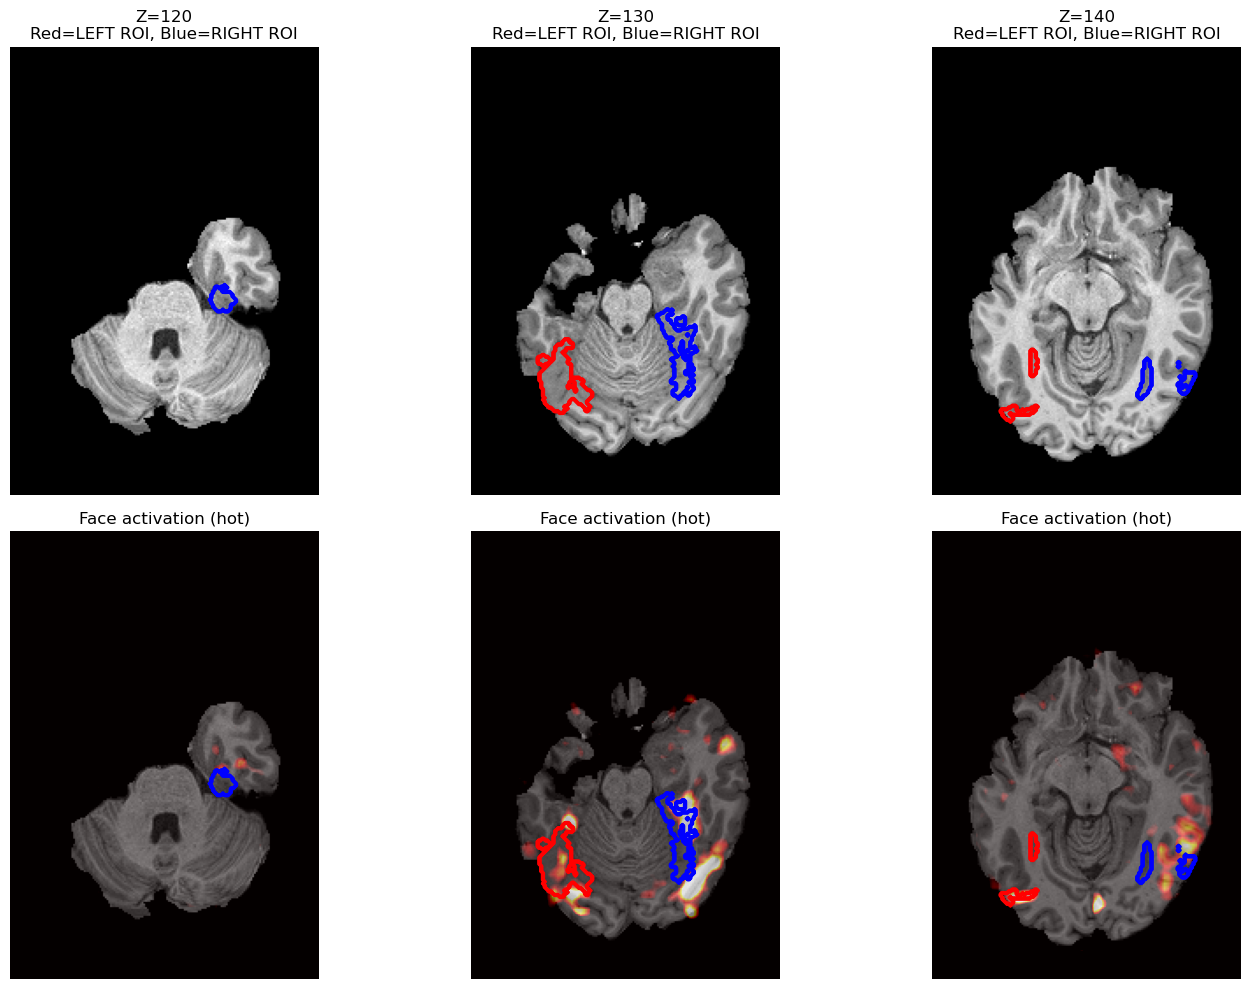

In [12]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

base = '/user_data/csimmon2/long_pt'

# Visualize BOTH hemisphere ROIs for sub-007 on the anatomy
subject = 'sub-007'

anat = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain.nii.gz')
face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
roi_l = nib.load(f'{base}/{subject}/ses-01/ROIs/l_VOTC_FG_OTS_mask.nii.gz')
roi_r = nib.load(f'{base}/{subject}/ses-01/ROIs/r_VOTC_FG_OTS_mask.nii.gz')

anat_data = anat.get_fdata()
face_data = face_zstat.get_fdata()
roi_l_data = roi_l.get_fdata()
roi_r_data = roi_r.get_fdata()

# Plot axial slices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Show anatomy with both ROIs
for i, z_slice in enumerate([120, 130, 140]):
    axes[0, i].imshow(np.rot90(anat_data[:, :, z_slice]), cmap='gray')
    axes[0, i].contour(np.rot90(roi_l_data[:, :, z_slice]), colors='red', linewidths=2)
    axes[0, i].contour(np.rot90(roi_r_data[:, :, z_slice]), colors='blue', linewidths=2)
    axes[0, i].set_title(f'Z={z_slice}\nRed=LEFT ROI, Blue=RIGHT ROI')
    axes[0, i].axis('off')
    
    # Show activation
    axes[1, i].imshow(np.rot90(anat_data[:, :, z_slice]), cmap='gray')
    axes[1, i].imshow(np.rot90(face_data[:, :, z_slice]), cmap='hot', alpha=0.5, vmin=2.3, vmax=8)
    axes[1, i].contour(np.rot90(roi_l_data[:, :, z_slice]), colors='red', linewidths=2)
    axes[1, i].contour(np.rot90(roi_r_data[:, :, z_slice]), colors='blue', linewidths=2)
    axes[1, i].set_title('Face activation (hot)')
    axes[1, i].axis('off')

plt.tight_layout()
plt.savefig(f'{base}/analyses/sub007_both_hemispheres.png', dpi=150)
print("Saved sub-007 bilateral visualization")

# Question: Is the left hemisphere anatomically damaged/resected in posterior regions?
print("\nChecking if LEFT posterior is actually damaged:")
brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
mask_data = brain_mask.get_fdata()

left_posterior_mask = mask_data.copy()
left_posterior_mask[mask_data.shape[0]//2:, :, :] = 0  # Left only
left_posterior_mask[:, :60, :] = 0  # Posterior only

left_post_brain = np.sum(left_posterior_mask > 0)
left_post_roi = np.sum((roi_l_data > 0) & (left_posterior_mask > 0))

print(f"LEFT posterior brain tissue: {left_post_brain} voxels")
print(f"LEFT ROI in posterior: {left_post_roi} voxels ({left_post_roi/np.sum(roi_l_data>0)*100:.1f}% of ROI)")

In [13]:
import nibabel as nib
import numpy as np
from scipy.ndimage import binary_dilation

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("DETERMINING REQUIRED MASK SIZE")
print("="*70)

for subject, hemi in [('sub-004', 'l'), ('sub-007', 'l')]:
    print(f"\n{subject}:")
    print("-"*70)
    
    # Load data
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    word_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope12.feat/stats/zstat1.nii.gz')
    current_roi = nib.load(f'{base}/{subject}/ses-01/ROIs/{hemi}_VOTC_FG_OTS_mask.nii.gz')
    brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
    
    face_data = face_zstat.get_fdata()
    word_data = word_zstat.get_fdata()
    current_roi_data = current_roi.get_fdata()
    brain_data = brain_mask.get_fdata()
    
    # Define ventral temporal region (Z < 145, Y > 35, appropriate hemisphere)
    ventral_mask = np.zeros_like(brain_data)
    if hemi == 'l':
        ventral_mask[:brain_data.shape[0]//2, 35:, :145] = 1
    else:
        ventral_mask[brain_data.shape[0]//2:, 35:, :145] = 1
    ventral_brain = brain_data * ventral_mask
    
    # Find all significantly activated voxels in ventral temporal
    threshold = 2.3
    face_activated = (face_data > threshold) & (ventral_brain > 0)
    word_activated = (word_data > threshold) & (ventral_brain > 0)
    either_activated = face_activated | word_activated
    
    n_face_activated = np.sum(face_activated)
    n_word_activated = np.sum(word_activated)
    n_either = np.sum(either_activated)
    
    print(f"  Current ROI size: {np.sum(current_roi_data > 0)} voxels")
    print(f"\n  Activated voxels in ventral temporal (z>2.3):")
    print(f"    Face>scramble: {n_face_activated}")
    print(f"    Word>scramble: {n_word_activated}")
    print(f"    Either face OR word: {n_either}")
    
    # How much does current ROI capture?
    face_captured = np.sum(face_activated & (current_roi_data > 0))
    word_captured = np.sum(word_activated & (current_roi_data > 0))
    
    print(f"\n  Current ROI captures:")
    print(f"    Face: {face_captured}/{n_face_activated} ({face_captured/n_face_activated*100:.1f}%)")
    print(f"    Word: {word_captured}/{n_word_activated} ({word_captured/n_word_activated*100:.1f}%)")
    
    # Test expanding ROI by different amounts
    print(f"\n  If we expand the current ROI:")
    for n_dilations in [5, 10, 15, 20]:
        expanded = binary_dilation(current_roi_data, iterations=n_dilations)
        expanded_size = np.sum(expanded)
        
        face_cap_exp = np.sum(face_activated & expanded)
        word_cap_exp = np.sum(word_activated & expanded)
        
        print(f"    +{n_dilations} voxels: size={expanded_size}, "
              f"face={face_cap_exp/n_face_activated*100:.0f}%, "
              f"word={word_cap_exp/n_word_activated*100:.0f}%")
    
    # What if we just use all ventral temporal as ROI?
    ventral_size = np.sum(ventral_brain > 0)
    print(f"\n  If we use ALL ventral temporal ({ventral_size} voxels):")
    print(f"    Would capture 100% of face and word activation")
    print(f"    But Liu used ~7-12K voxels, this would be ~{ventral_size}")

DETERMINING REQUIRED MASK SIZE

sub-004:
----------------------------------------------------------------------
  Current ROI size: 7590 voxels

  Activated voxels in ventral temporal (z>2.3):
    Face>scramble: 4613
    Word>scramble: 2537
    Either face OR word: 6502

  Current ROI captures:
    Face: 539/4613 (11.7%)
    Word: 125/2537 (4.9%)

  If we expand the current ROI:
    +5 voxels: size=32489, face=37%, word=20%
    +10 voxels: size=63815, face=46%, word=34%
    +15 voxels: size=104488, face=57%, word=46%
    +20 voxels: size=155570, face=66%, word=51%

  If we use ALL ventral temporal (268087 voxels):
    Would capture 100% of face and word activation
    But Liu used ~7-12K voxels, this would be ~268087

sub-007:
----------------------------------------------------------------------
  Current ROI size: 6937 voxels

  Activated voxels in ventral temporal (z>2.3):
    Face>scramble: 10717
    Word>scramble: 9176
    Either face OR word: 16312

  Current ROI captures:
    Fa

In [15]:
import nibabel as nib
import numpy as np

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("CREATING FUNCTIONAL ROI (Top selective voxels in ventral temporal)")
print("="*70)

for subject, hemi in [('sub-004', 'l'), ('sub-007', 'l'), ('sub-021', 'r')]:
    print(f"\n{subject} ({hemi} hemisphere):")
    print("-"*70)
    
    # Load data
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    word_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope12.feat/stats/zstat1.nii.gz')
    brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
    
    face_data = face_zstat.get_fdata()
    word_data = word_zstat.get_fdata()
    brain_data = brain_mask.get_fdata()
    
    # Define ventral temporal search space
    ventral_mask = np.zeros_like(brain_data)
    if hemi == 'l':
        ventral_mask[:brain_data.shape[0]//2, 35:, :145] = 1
    else:
        ventral_mask[brain_data.shape[0]//2:, 35:, :145] = 1
    ventral_brain = brain_data * ventral_mask
    
    # Get face and word values in ventral temporal
    face_ventral = face_data * (ventral_brain > 0)
    word_ventral = word_data * (ventral_brain > 0)
    
    # Take top N voxels for each
    n_voxels = 5000  # Approximate half of Liu's ROI size
    
    face_flat = face_ventral.flatten()
    word_flat = word_ventral.flatten()
    
    face_threshold = np.partition(face_flat, -n_voxels)[-n_voxels]
    word_threshold = np.partition(word_flat, -n_voxels)[-n_voxels]
    
    # Create functional ROI = union of top face AND top word voxels
    functional_roi = ((face_ventral >= face_threshold) | (word_ventral >= word_threshold)) & (ventral_brain > 0)
    functional_roi = functional_roi.astype(np.uint8)  # Fix dtype
    
    roi_size = np.sum(functional_roi)
    
    # Test this ROI
    face_in_roi = face_data[functional_roi > 0]
    word_in_roi = word_data[functional_roi > 0]
    
    print(f"  Functional ROI size: {roi_size} voxels")
    print(f"  Face>scramble: mean={face_in_roi.mean():.2f}, {np.sum(face_in_roi>2.3)} activated")
    print(f"  Word>scramble: mean={word_in_roi.mean():.2f}, {np.sum(word_in_roi>2.3)} activated")
    
    # Save
    roi_img = nib.Nifti1Image(functional_roi, brain_mask.affine)
    output_path = f'{base}/{subject}/ses-01/ROIs/{hemi}_VOTC_functional.nii.gz'
    nib.save(roi_img, output_path)
    print(f"  Saved: {output_path}")

print("\n" + "="*70)
print("SUMMARY: Functional ROIs capture actual selectivity")
print("Ready to extract longitudinal data from these ROIs")
print("="*70)

CREATING FUNCTIONAL ROI (Top selective voxels in ventral temporal)

sub-004 (l hemisphere):
----------------------------------------------------------------------
  Functional ROI size: 8926 voxels
  Face>scramble: mean=1.92, 4613 activated
  Word>scramble: mean=1.55, 2537 activated
  Saved: /user_data/csimmon2/long_pt/sub-004/ses-01/ROIs/l_VOTC_functional.nii.gz

sub-007 (l hemisphere):
----------------------------------------------------------------------
  Functional ROI size: 8446 voxels
  Face>scramble: mean=4.06, 5787 activated
  Word>scramble: mean=2.67, 5577 activated
  Saved: /user_data/csimmon2/long_pt/sub-007/ses-01/ROIs/l_VOTC_functional.nii.gz

sub-021 (r hemisphere):
----------------------------------------------------------------------
  Functional ROI size: 8606 voxels
  Face>scramble: mean=6.72, 6904 activated
  Word>scramble: mean=2.48, 5599 activated
  Saved: /user_data/csimmon2/long_pt/sub-021/ses-01/ROIs/r_VOTC_functional.nii.gz

SUMMARY: Functional ROIs capture ac

Saved: functional_vs_anatomical_rois.png

This shows where the functional ROIs are vs your original anatomical ROIs


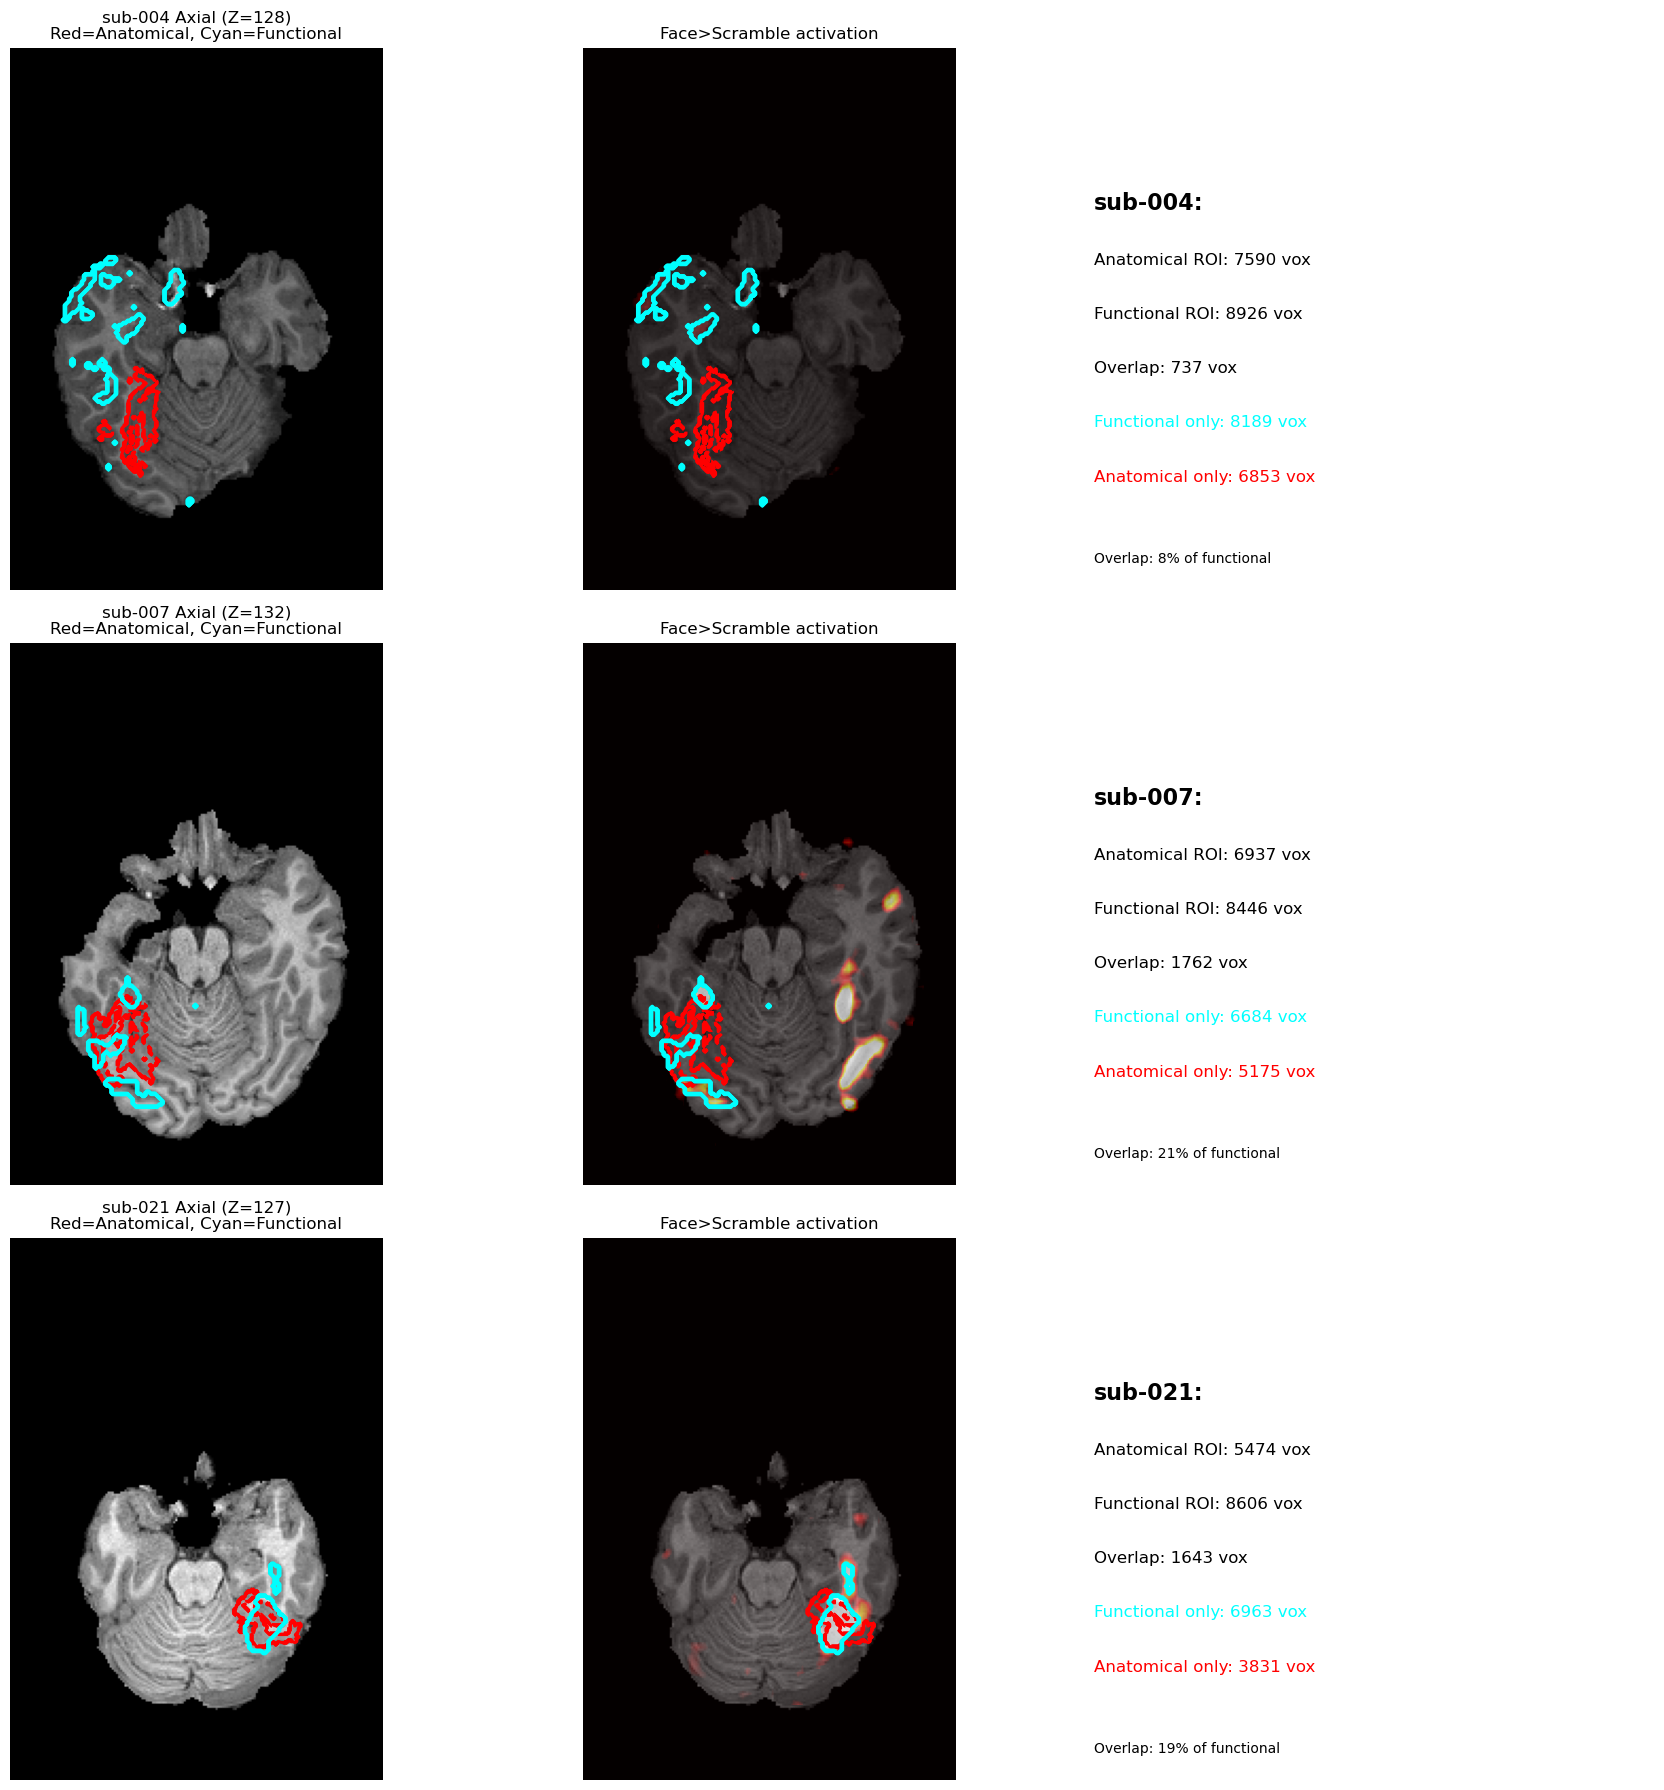

In [16]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

base = '/user_data/csimmon2/long_pt'

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

for row, (subject, hemi) in enumerate([('sub-004', 'l'), ('sub-007', 'l'), ('sub-021', 'r')]):
    # Load data
    anat = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain.nii.gz')
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    roi_anat = nib.load(f'{base}/{subject}/ses-01/ROIs/{hemi}_VOTC_FG_OTS_mask.nii.gz')
    roi_func = nib.load(f'{base}/{subject}/ses-01/ROIs/{hemi}_VOTC_functional.nii.gz')
    
    anat_data = anat.get_fdata()
    face_data = face_zstat.get_fdata()
    roi_anat_data = roi_anat.get_fdata()
    roi_func_data = roi_func.get_fdata()
    
    # Find center of functional ROI
    func_coords = np.where(roi_func_data > 0)
    center_z = int(np.mean(func_coords[2]))
    
    # Axial view
    axes[row, 0].imshow(np.rot90(anat_data[:, :, center_z]), cmap='gray')
    axes[row, 0].contour(np.rot90(roi_anat_data[:, :, center_z]), colors='red', linewidths=2, linestyles='dashed')
    axes[row, 0].contour(np.rot90(roi_func_data[:, :, center_z]), colors='cyan', linewidths=2)
    axes[row, 0].set_title(f'{subject} Axial (Z={center_z})\nRed=Anatomical, Cyan=Functional')
    axes[row, 0].axis('off')
    
    # Show activation with both ROIs
    axes[row, 1].imshow(np.rot90(anat_data[:, :, center_z]), cmap='gray')
    axes[row, 1].imshow(np.rot90(face_data[:, :, center_z]), cmap='hot', alpha=0.5, vmin=2.3, vmax=8)
    axes[row, 1].contour(np.rot90(roi_anat_data[:, :, center_z]), colors='red', linewidths=2, linestyles='dashed')
    axes[row, 1].contour(np.rot90(roi_func_data[:, :, center_z]), colors='cyan', linewidths=2)
    axes[row, 1].set_title('Face>Scramble activation')
    axes[row, 1].axis('off')
    
    # Overlap statistics
    overlap = np.sum((roi_anat_data > 0) & (roi_func_data > 0))
    func_only = np.sum((roi_func_data > 0) & (roi_anat_data == 0))
    anat_only = np.sum((roi_anat_data > 0) & (roi_func_data == 0))
    
    axes[row, 2].axis('off')
    axes[row, 2].text(0.1, 0.7, f'{subject}:', fontsize=16, weight='bold')
    axes[row, 2].text(0.1, 0.6, f'Anatomical ROI: {np.sum(roi_anat_data>0)} vox', fontsize=12)
    axes[row, 2].text(0.1, 0.5, f'Functional ROI: {np.sum(roi_func_data>0)} vox', fontsize=12)
    axes[row, 2].text(0.1, 0.4, f'Overlap: {overlap} vox', fontsize=12)
    axes[row, 2].text(0.1, 0.3, f'Functional only: {func_only} vox', fontsize=12, color='cyan')
    axes[row, 2].text(0.1, 0.2, f'Anatomical only: {anat_only} vox', fontsize=12, color='red')
    axes[row, 2].text(0.1, 0.05, f'Overlap: {overlap/np.sum(roi_func_data>0)*100:.0f}% of functional', fontsize=10)

plt.tight_layout()
plt.savefig(f'{base}/analyses/functional_vs_anatomical_rois.png', dpi=150, bbox_inches='tight')
print("Saved: functional_vs_anatomical_rois.png")
print("\nThis shows where the functional ROIs are vs your original anatomical ROIs")

In [18]:
import nibabel as nib
import numpy as np
from scipy import ndimage

base = '/user_data/csimmon2/long_pt'

print("="*70)
print("FUNCTIONAL ROI - PROPER APPROACH (Largest Coherent Cluster)")
print("="*70)

for subject, hemi in [('sub-004', 'l'), ('sub-007', 'l'), ('sub-021', 'r')]:
    print(f"\n{subject} ({hemi} hemisphere):")
    print("-"*70)
    
    # Load data
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
    
    face_data = face_zstat.get_fdata()
    brain_data = brain_mask.get_fdata()
    
    # Define ventral temporal search space
    ventral_mask = np.zeros_like(brain_data)
    if hemi == 'l':
        ventral_mask[:brain_data.shape[0]//2, 35:, :145] = 1
    else:
        ventral_mask[brain_data.shape[0]//2:, 35:, :145] = 1
    ventral_brain = brain_data * ventral_mask
    
    # Threshold face activation
    threshold = 2.3
    activated = (face_data > threshold) & (ventral_brain > 0)
    
    # Find clusters
    labeled_array, num_clusters = ndimage.label(activated)
    
    # Get cluster sizes
    cluster_sizes = ndimage.sum(activated, labeled_array, range(1, num_clusters + 1))
    
    # Find LARGEST cluster
    if len(cluster_sizes) > 0:
        largest_cluster_id = np.argmax(cluster_sizes) + 1
        largest_cluster_size = int(cluster_sizes[largest_cluster_id - 1])
        
        # Create ROI from largest cluster
        functional_roi = (labeled_array == largest_cluster_id).astype(np.uint8)
        
        # Stats
        face_in_roi = face_data[functional_roi > 0]
        
        print(f"  Largest coherent cluster: {largest_cluster_size} voxels")
        print(f"  Face>scramble mean: {face_in_roi.mean():.2f}")
        print(f"  Face>scramble max: {face_in_roi.max():.2f}")
        
        # Save
        roi_img = nib.Nifti1Image(functional_roi, brain_mask.affine)
        output_path = f'{base}/{subject}/ses-01/ROIs/{hemi}_VOTC_functional_cluster.nii.gz'
        nib.save(roi_img, output_path)
        print(f"  Saved: {output_path}")

FUNCTIONAL ROI - PROPER APPROACH (Largest Coherent Cluster)

sub-004 (l hemisphere):
----------------------------------------------------------------------
  Largest coherent cluster: 1853 voxels
  Face>scramble mean: 3.00
  Face>scramble max: 5.09
  Saved: /user_data/csimmon2/long_pt/sub-004/ses-01/ROIs/l_VOTC_functional_cluster.nii.gz

sub-007 (l hemisphere):
----------------------------------------------------------------------
  Largest coherent cluster: 6921 voxels
  Face>scramble mean: 5.19
  Face>scramble max: 16.72
  Saved: /user_data/csimmon2/long_pt/sub-007/ses-01/ROIs/l_VOTC_functional_cluster.nii.gz

sub-021 (r hemisphere):
----------------------------------------------------------------------
  Largest coherent cluster: 27844 voxels
  Face>scramble mean: 4.93
  Face>scramble max: 17.26
  Saved: /user_data/csimmon2/long_pt/sub-021/ses-01/ROIs/r_VOTC_functional_cluster.nii.gz


In [20]:
import nibabel as nib
import numpy as np
from scipy import ndimage

base = '/user_data/csimmon2/long_pt'

target_size = 7500  # Middle of Liu's range (7K-12K)

print("="*70)
print(f"FUNCTIONAL ROI - STANDARDIZED SIZE ({target_size} voxels)")
print("="*70)

for subject, hemi in [('sub-004', 'l'), ('sub-007', 'l'), ('sub-021', 'r')]:
    print(f"\n{subject} ({hemi} hemisphere):")
    print("-"*70)
    
    # Load data
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    brain_mask = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain_mask.nii.gz')
    
    face_data = face_zstat.get_fdata()
    brain_data = brain_mask.get_fdata()
    
    # Define ventral temporal search space
    ventral_mask = np.zeros_like(brain_data)
    if hemi == 'l':
        ventral_mask[:brain_data.shape[0]//2, 35:, :145] = 1
    else:
        ventral_mask[brain_data.shape[0]//2:, 35:, :145] = 1
    ventral_brain = brain_data * ventral_mask
    
    # Threshold face activation
    threshold = 2.3
    activated = (face_data > threshold) & (ventral_brain > 0)
    
    # Find largest cluster
    labeled_array, num_clusters = ndimage.label(activated)
    cluster_sizes = ndimage.sum(activated, labeled_array, range(1, num_clusters + 1))
    largest_cluster_id = np.argmax(cluster_sizes) + 1
    largest_cluster_mask = labeled_array == largest_cluster_id
    
    # Within largest cluster, select top N most selective voxels
    face_in_cluster = face_data * largest_cluster_mask
    face_flat = face_in_cluster.flatten()
    
    # Get threshold for top N voxels
    n_voxels = min(target_size, int(cluster_sizes[largest_cluster_id - 1]))
    threshold_top = np.partition(face_flat, -n_voxels)[-n_voxels]
    
    # Create final ROI
    functional_roi = ((face_in_cluster >= threshold_top) & (largest_cluster_mask)).astype(np.uint8)
    
    roi_size = np.sum(functional_roi)
    
    # Stats
    face_in_roi = face_data[functional_roi > 0]
    
    print(f"  Largest cluster: {int(cluster_sizes[largest_cluster_id - 1])} voxels")
    print(f"  Selected top {roi_size} voxels from cluster")
    print(f"  Face>scramble mean: {face_in_roi.mean():.2f}")
    print(f"  Face>scramble min threshold: {face_in_roi.min():.2f}")
    
    # Save
    roi_img = nib.Nifti1Image(functional_roi, brain_mask.affine)
    output_path = f'{base}/{subject}/ses-01/ROIs/{hemi}_VOTC_functional_final.nii.gz'
    nib.save(roi_img, output_path)
    print(f"  Saved: {output_path}")

print("\n" + "="*70)
print("All subjects now have ~7.5K voxels with highest face selectivity")
print("="*70)

FUNCTIONAL ROI - STANDARDIZED SIZE (7500 voxels)

sub-004 (l hemisphere):
----------------------------------------------------------------------
  Largest cluster: 1853 voxels
  Selected top 1853 voxels from cluster
  Face>scramble mean: 3.00
  Face>scramble min threshold: 2.30
  Saved: /user_data/csimmon2/long_pt/sub-004/ses-01/ROIs/l_VOTC_functional_final.nii.gz

sub-007 (l hemisphere):
----------------------------------------------------------------------
  Largest cluster: 6921 voxels
  Selected top 6921 voxels from cluster
  Face>scramble mean: 5.19
  Face>scramble min threshold: 2.30
  Saved: /user_data/csimmon2/long_pt/sub-007/ses-01/ROIs/l_VOTC_functional_final.nii.gz

sub-021 (r hemisphere):
----------------------------------------------------------------------
  Largest cluster: 27844 voxels
  Selected top 7500 voxels from cluster
  Face>scramble mean: 8.47
  Face>scramble min threshold: 5.82
  Saved: /user_data/csimmon2/long_pt/sub-021/ses-01/ROIs/r_VOTC_functional_final.nii

Saved: functional_cluster_rois.png

Check if these ROIs are in fusiform gyrus/ventral temporal


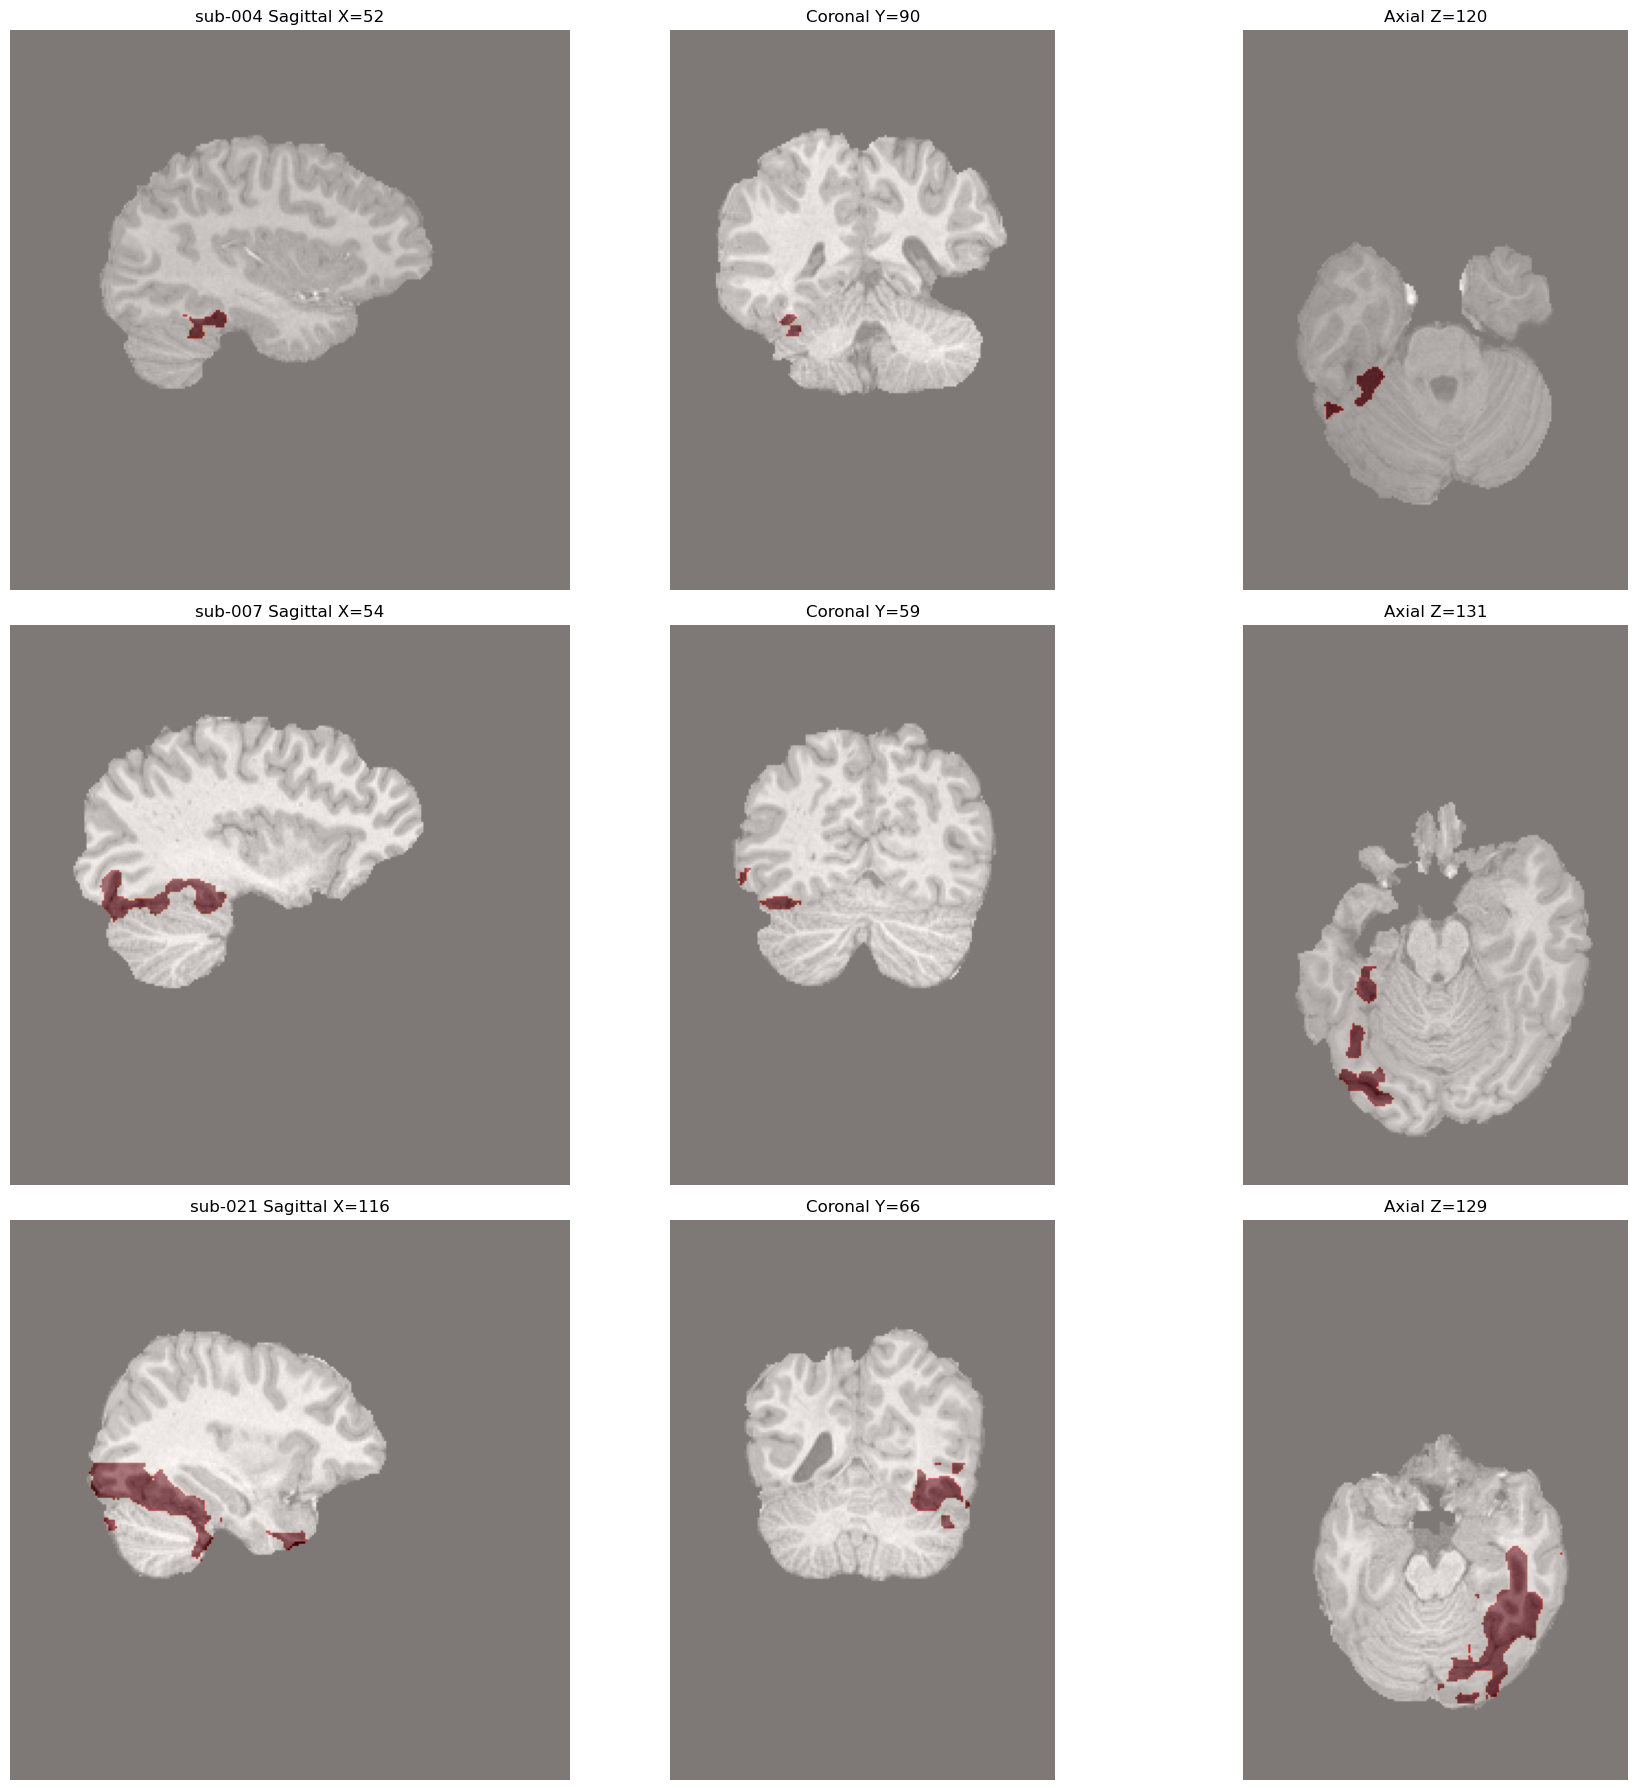

In [21]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

base = '/user_data/csimmon2/long_pt'

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

for row, (subject, hemi) in enumerate([('sub-004', 'l'), ('sub-007', 'l'), ('sub-021', 'r')]):
    # Load
    anat = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain.nii.gz')
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    roi_cluster = nib.load(f'{base}/{subject}/ses-01/ROIs/{hemi}_VOTC_functional_cluster.nii.gz')
    
    anat_data = anat.get_fdata()
    face_data = face_zstat.get_fdata()
    roi_data = roi_cluster.get_fdata()
    
    # Get ROI center for slicing
    coords = np.where(roi_data > 0)
    center_x = int(np.mean(coords[0]))
    center_y = int(np.mean(coords[1]))
    center_z = int(np.mean(coords[2]))
    
    # Sagittal
    axes[row, 0].imshow(np.rot90(anat_data[center_x, :, :]), cmap='gray')
    axes[row, 0].imshow(np.rot90(roi_data[center_x, :, :]), cmap='Reds', alpha=0.5)
    axes[row, 0].set_title(f'{subject} Sagittal X={center_x}')
    axes[row, 0].axis('off')
    
    # Coronal
    axes[row, 1].imshow(np.rot90(anat_data[:, center_y, :]), cmap='gray')
    axes[row, 1].imshow(np.rot90(roi_data[:, center_y, :]), cmap='Reds', alpha=0.5)
    axes[row, 1].set_title(f'Coronal Y={center_y}')
    axes[row, 1].axis('off')
    
    # Axial
    axes[row, 2].imshow(np.rot90(anat_data[:, :, center_z]), cmap='gray')
    axes[row, 2].imshow(np.rot90(roi_data[:, :, center_z]), cmap='Reds', alpha=0.5)
    axes[row, 2].set_title(f'Axial Z={center_z}')
    axes[row, 2].axis('off')

plt.tight_layout()
plt.savefig(f'{base}/analyses/functional_cluster_rois.png', dpi=150, bbox_inches='tight')
print("Saved: functional_cluster_rois.png")
print("\nCheck if these ROIs are in fusiform gyrus/ventral temporal")

STANDARDIZED FUNCTIONAL ROI VISUALIZATION

sub-004:
  ROI size: 1853 voxels
  Mean face>scramble: 3.00

sub-007:
  ROI size: 6921 voxels
  Mean face>scramble: 5.19

sub-021:
  ROI size: 7500 voxels
  Mean face>scramble: 8.47

Saved: functional_rois_standardized.png


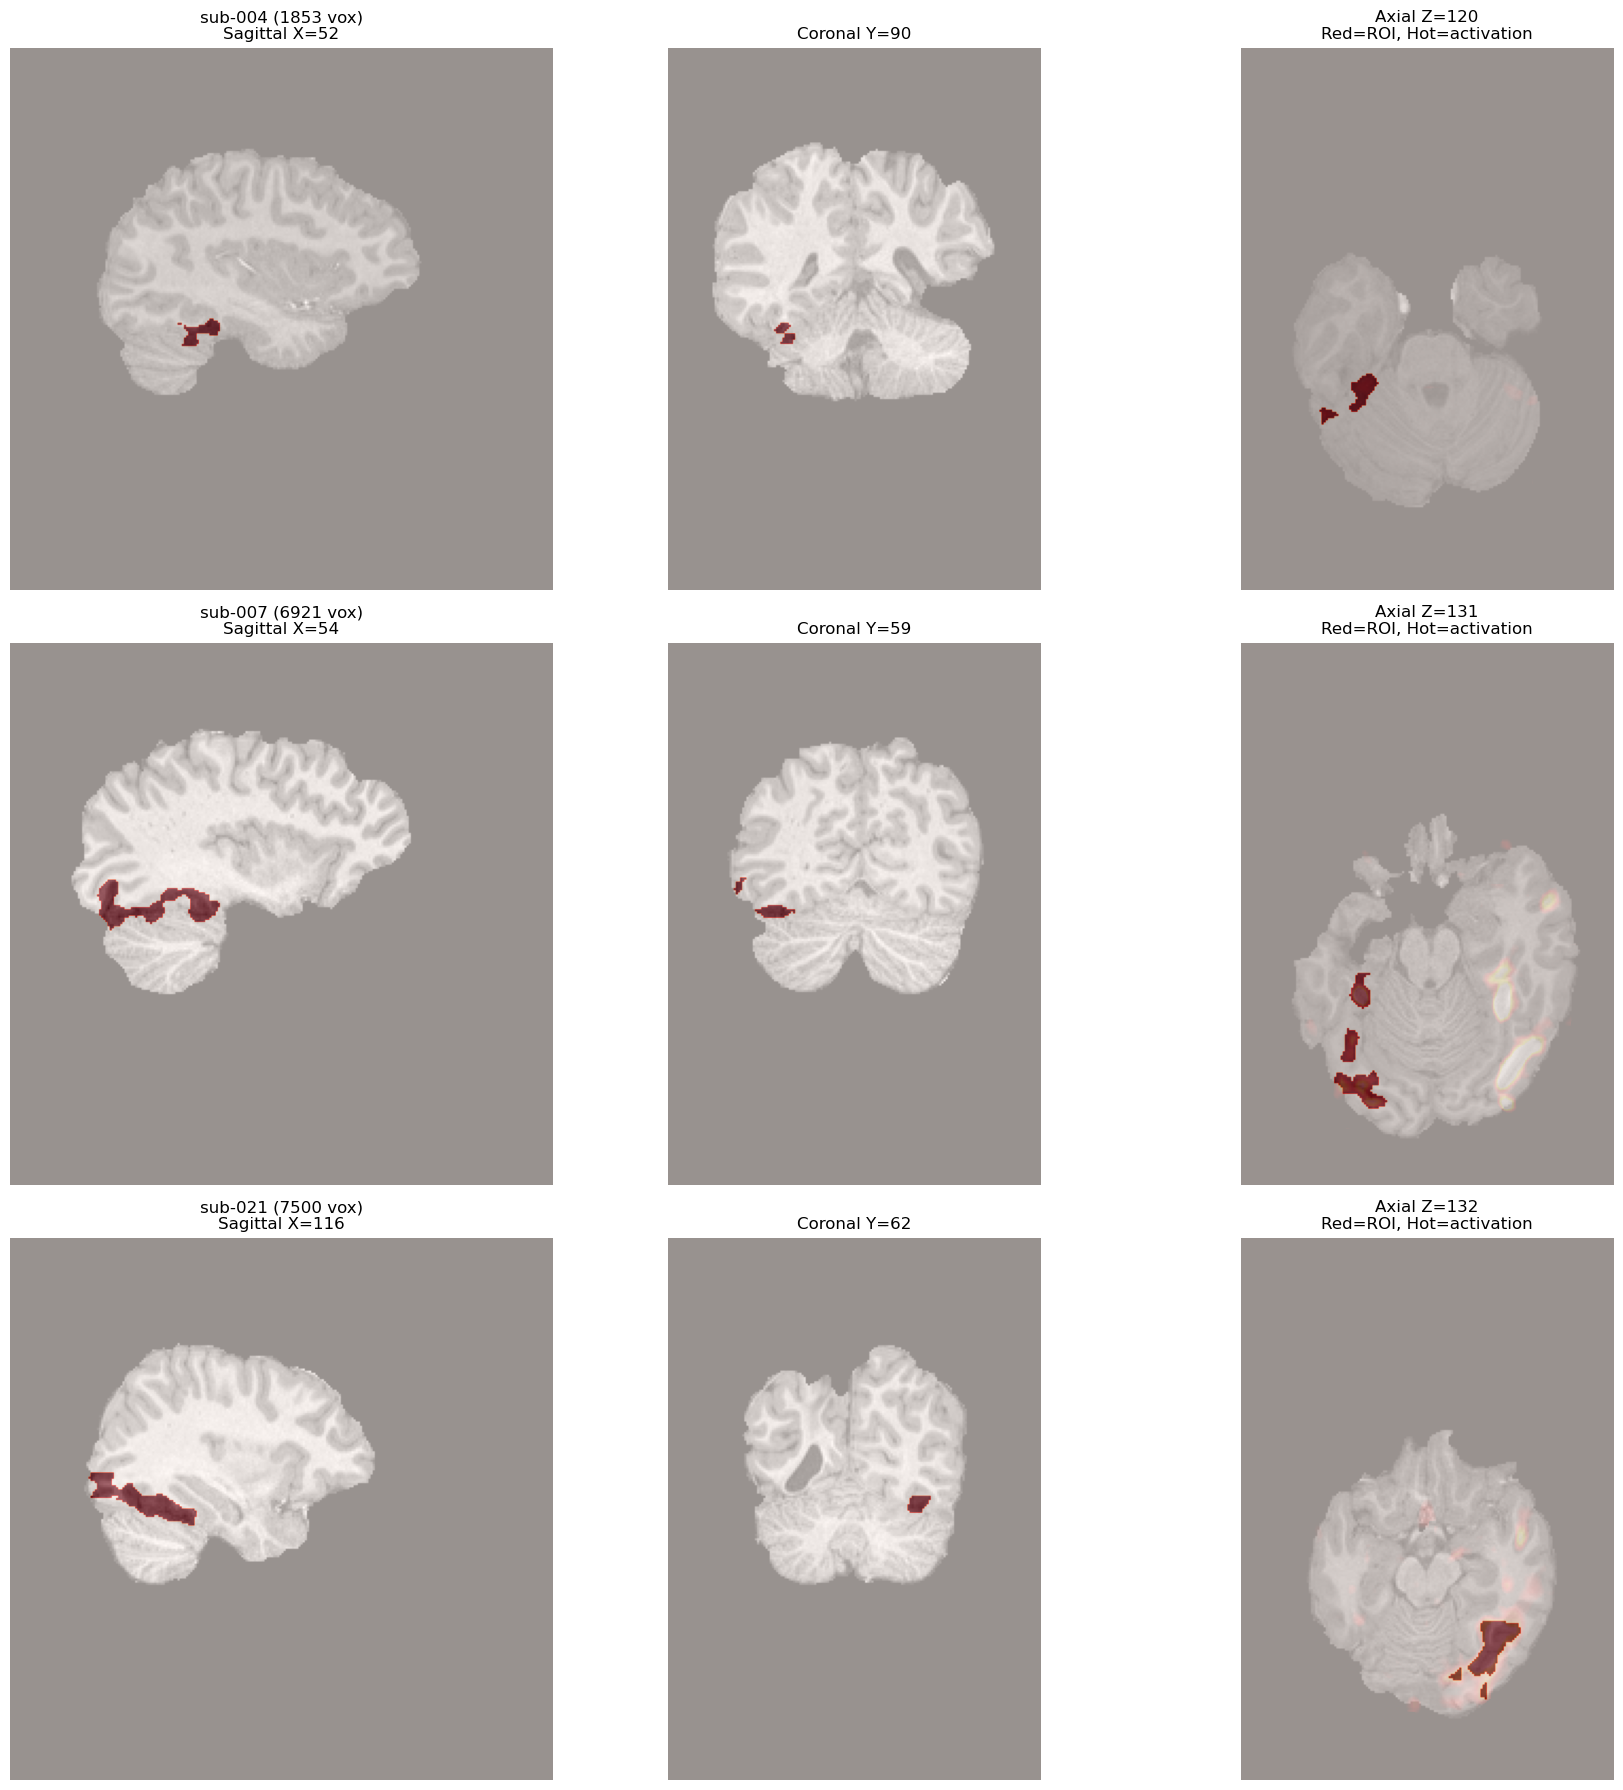

In [22]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

base = '/user_data/csimmon2/long_pt'

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

print("="*70)
print("STANDARDIZED FUNCTIONAL ROI VISUALIZATION")
print("="*70)

for row, (subject, hemi) in enumerate([('sub-004', 'l'), ('sub-007', 'l'), ('sub-021', 'r')]):
    # Load
    anat = nib.load(f'{base}/{subject}/ses-01/anat/{subject}_ses-01_T1w_brain.nii.gz')
    face_zstat = nib.load(f'{base}/{subject}/ses-01/derivatives/fsl/loc/HighLevel.gfeat/cope10.feat/stats/zstat1.nii.gz')
    roi_final = nib.load(f'{base}/{subject}/ses-01/ROIs/{hemi}_VOTC_functional_final.nii.gz')
    
    anat_data = anat.get_fdata()
    face_data = face_zstat.get_fdata()
    roi_data = roi_final.get_fdata()
    
    # Get ROI info
    roi_size = np.sum(roi_data > 0)
    face_in_roi = face_data[roi_data > 0]
    
    print(f"\n{subject}:")
    print(f"  ROI size: {roi_size} voxels")
    print(f"  Mean face>scramble: {face_in_roi.mean():.2f}")
    
    # Get ROI center for slicing
    coords = np.where(roi_data > 0)
    center_x = int(np.mean(coords[0]))
    center_y = int(np.mean(coords[1]))
    center_z = int(np.mean(coords[2]))
    
    # Sagittal
    axes[row, 0].imshow(np.rot90(anat_data[center_x, :, :]), cmap='gray')
    axes[row, 0].imshow(np.rot90(roi_data[center_x, :, :]), cmap='Reds', alpha=0.6)
    axes[row, 0].set_title(f'{subject} ({roi_size} vox)\nSagittal X={center_x}')
    axes[row, 0].axis('off')
    
    # Coronal
    axes[row, 1].imshow(np.rot90(anat_data[:, center_y, :]), cmap='gray')
    axes[row, 1].imshow(np.rot90(roi_data[:, center_y, :]), cmap='Reds', alpha=0.6)
    axes[row, 1].set_title(f'Coronal Y={center_y}')
    axes[row, 1].axis('off')
    
    # Axial with activation overlay
    axes[row, 2].imshow(np.rot90(anat_data[:, :, center_z]), cmap='gray')
    axes[row, 2].imshow(np.rot90(face_data[:, :, center_z]), cmap='hot', alpha=0.3, vmin=2.3, vmax=8)
    axes[row, 2].imshow(np.rot90(roi_data[:, :, center_z]), cmap='Reds', alpha=0.6)
    axes[row, 2].set_title(f'Axial Z={center_z}\nRed=ROI, Hot=activation')
    axes[row, 2].axis('off')

plt.tight_layout()
plt.savefig(f'{base}/analyses/functional_rois_standardized.png', dpi=150, bbox_inches='tight')
print("\nSaved: functional_rois_standardized.png")
print("="*70)